In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl
from matplotlib.patches import Patch
from matplotlib.lines import Line2D


figdir = 'figs/'

In [2]:
### explore modeled & observed streamflow data from Aubrey Dugger (NCAR)
df_nhm = pd.read_csv('input_data/modeled_gages/streamflow_daily_nhmv10.txt', sep = '\t', dtype = {'site_no': str})
df_nhm.index = pd.to_datetime(df_nhm['UTC_date'])
df_nhm.head()

site_no    UTC_date  q_cms_obs  q_cms_mod    tag
UTC_date                                                     
1983-10-01  01417000  1983-10-01   1.880239   2.970378  nhmv1
1983-10-02  01417000  1983-10-02   1.976516   3.046074  nhmv1
1983-10-03  01417000  1983-10-03   1.987843   3.102649  nhmv1
1983-10-04  01417000  1983-10-04   1.982179   3.100692  nhmv1
1983-10-05  01417000  1983-10-05   2.010496   3.012292  nhmv1

In [3]:
### explore modeled & observed streamflow data from Aubrey Dugger (NCAR)
df_nwm = pd.read_csv('input_data/modeled_gages/streamflow_daily_nwmv21.txt', sep = '\t', dtype = {'site_no': str})
df_nwm.index = pd.to_datetime(df_nwm['UTC_date'])
df_nwm.tail()

site_no    UTC_date  q_cms_obs  q_cms_mod  \
UTC_date                                                 
2016-12-27  01481500  2016-12-27   6.399607  10.205416   
2016-12-28  01481500  2016-12-28   6.144756   9.650833   
2016-12-29  01481500  2016-12-29   6.512875   8.673750   
2016-12-30  01481500  2016-12-30   7.334063   9.230000   
2016-12-31  01481500  2016-12-31   6.173073  10.423333   

                                 tag  
UTC_date                              
2016-12-27  NWMV21_FullRouting_Retro  
2016-12-28  NWMV21_FullRouting_Retro  
2016-12-29  NWMV21_FullRouting_Retro  
2016-12-30  NWMV21_FullRouting_Retro  
2016-12-31  NWMV21_FullRouting_Retro

In [4]:
### explore NWM reservoir inflows from Aubrey Dugger (NCAR)
df_nwm_res = pd.read_csv('input_data/modeled_gages/lakes_daily_1979_2020_nwmv21.csv', dtype = {'feature_id': str})
df_nwm_res.index = pd.to_datetime(df_nwm_res['UTC_date'])
df_nwm_res.tail()

tag feature_id    UTC_date  inflow  outflow  water_sfc_elev  \
UTC_date                                                                     
2020-09-27  nwmv21  120053209  2020-09-27     0.0     0.03      224.766876   
2020-09-28  nwmv21  120053209  2020-09-28     0.0     0.03      224.766876   
2020-09-29  nwmv21  120053209  2020-09-29     0.0     0.03      224.766876   
2020-09-30  nwmv21  120053209  2020-09-30     0.0     0.03      224.766876   
2020-10-01  nwmv21  120053209  2020-10-01     0.0     0.03      224.766876   

               POSIXct  
UTC_date                
2020-09-27  2020-09-27  
2020-09-28  2020-09-28  
2020-09-29  2020-09-29  
2020-09-30  2020-09-30  
2020-10-01  2020-10-01

In [5]:
### reshape dataframe to have gages as columns
ndays = len(set(df_nhm['UTC_date']))

sites = list(set(df_nhm['site_no']))

obs = df_nhm.iloc[:ndays, -1:]
nhm = df_nhm.iloc[:ndays, -1:]
nwm = df_nwm.iloc[:ndays, -1:]
for site in sites:
    obs[site] = df_nhm.loc[df_nhm['site_no'] == site, 'q_cms_obs']
    nhm[site] = df_nhm.loc[df_nhm['site_no'] == site, 'q_cms_mod']
    nwm[site] = df_nwm.loc[df_nwm['site_no'] == site, 'q_cms_mod']
obs.drop('tag', axis=1, inplace=True)
nhm.drop('tag', axis=1, inplace=True)
nwm.drop('tag', axis=1, inplace=True)

### convert cms -> mgd
obs *= 22.82
nhm *= 22.82
nwm *= 22.82

nwm.head()

01437500  01429000    01428500    01446500   01449800  \
UTC_date                                                              
1983-10-01  100.949973  6.389600  233.058753  749.846167  45.639999   
1983-10-02  100.246356  6.332550  231.622995  743.199842  45.639999   
1983-10-03   99.818481  6.161400  230.263303  737.124017  45.639999   
1983-10-04   99.314539  6.161400  228.970170  731.618692  45.639999   
1983-10-05   98.962731  6.123367  227.715070  727.130759  45.639999   

             01431500  01455500   01417000   01425000   01480015  ...  \
UTC_date                                                          ...   
1983-10-01  29.399766   13.2356  75.153865  58.190999  23.276399  ...   
1983-10-02  29.152549   13.2356  74.431232  58.190999  23.048199  ...   
1983-10-03  28.905333   13.2356  73.718107  58.190999  23.000658  ...   
1983-10-04  28.648608   13.2356  73.023998  58.190999  22.819999  ...   
1983-10-05  28.382374   13.2356  72.339398  58.190999  22.715408  ...   

             01479000   01470960   01459500   01433500    01474500  \
UTC_date                                                             
1983-10-01  40.163199  31.719799  43.586199  65.426840  458.824615   
1983-10-02  40.058607  31.719799  43.310457  65.265199  457.826240   
1983-10-03  39.934999  31.719799  43.044224  65.151099  448.546107   
1983-10-04  39.754341  31.719799  42.787499  65.036999  441.928307   
1983-10-05  39.630732  31.719799  42.521266  64.903882  437.801690   

              01427207    01481500  01463620   01473000  01480685  
UTC_date                                                           
1983-10-01  209.278412  100.265373  1.540350  49.224641    0.6846  
1983-10-02  208.242004  100.617181  1.835108  49.528907    0.6846  
1983-10-03  207.300679  100.626689  3.812842  49.110541    0.6846  
1983-10-04  206.692145   99.780448  1.930192  47.960032    0.6846  
1983-10-05  206.387879   98.420756  1.654450  48.254791    0.6846  

[5 rows x 28 columns]

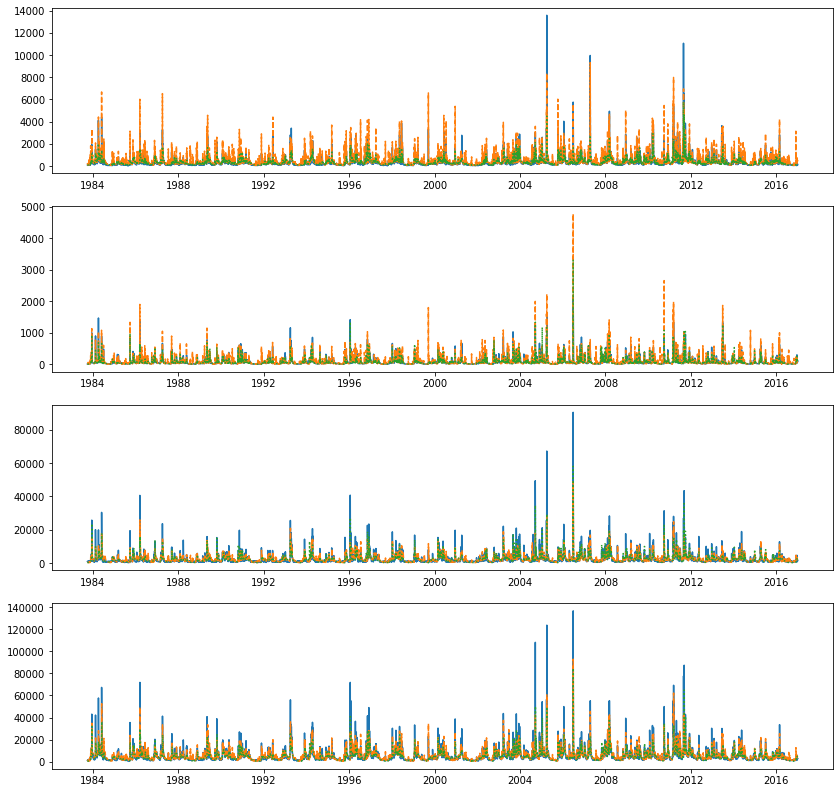

In [6]:
### compare estimates from models & observations
num_sites = 9
fig, axs = plt.subplots(4,1, figsize=(14,14))
axnum = 0
for i in range(4):
    ax = axs[i]
    ax.plot(obs[sites[axnum]])
    ax.plot(nhm[sites[axnum]], ls='--')
    ax.plot(nwm[sites[axnum]], ls=':')
    axnum += 1



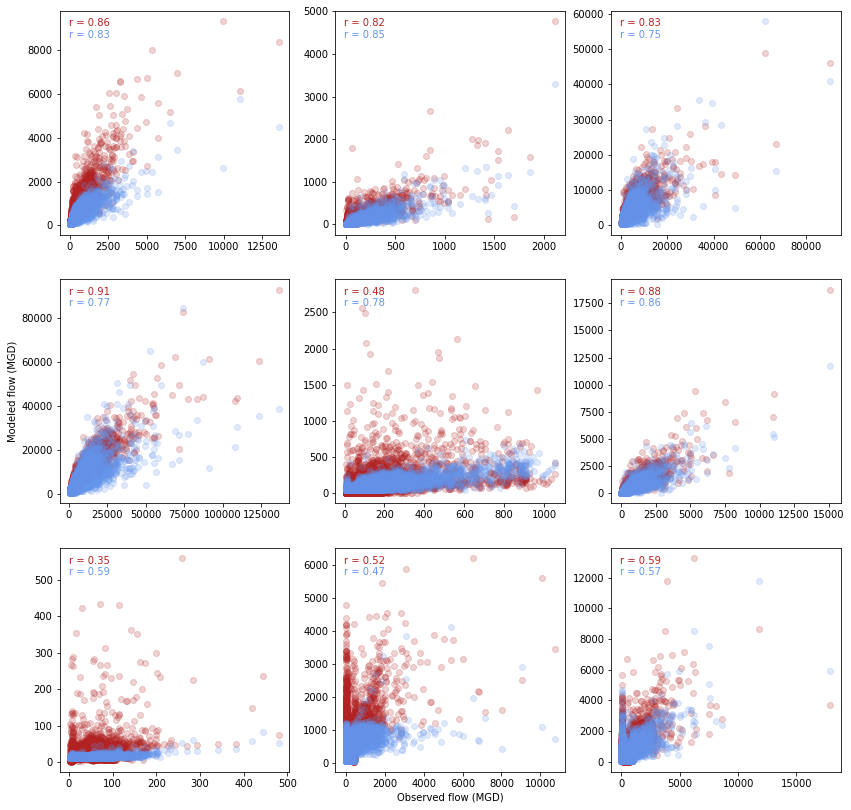

In [7]:
### compare estimates from models & observations
import numpy.ma as ma

def corrcoef_nan_masked(a, b, log=False):
    if log:
        a = np.log(a + 0.01)
        b = np.log(b + 0.01)
    return round(ma.corrcoef(ma.masked_invalid(a), ma.masked_invalid(b))[0,1], 2)

### evaluate fit with NSE
def nse(predictions, targets, log=False):
    if log:
        predictions = np.log(predictions + 0.01)
        targets = np.log(targets + 0.01)
    return round(1-(np.sum((predictions-targets)**2)/np.sum((targets-np.mean(targets))**2)), 2)

import hydroeval as he

num_sites = 9
fig, axs = plt.subplots(3,3, figsize=(14,14))
axnum = 0
for i in range(3):
    for j in range(3):
        ax = axs[i,j]
        ax.scatter(obs[sites[axnum]], nhm[sites[axnum]], color='firebrick', alpha=0.2, zorder=2)
        ax.scatter(obs[sites[axnum]], nwm[sites[axnum]], color='cornflowerblue', alpha=0.2, zorder=3)
        ax.annotate(f'r = {corrcoef_nan_masked(obs[sites[axnum]], nhm[sites[axnum]])}',
                    xy = (0.04,0.93), xycoords=ax.transAxes, color = 'firebrick')
        ax.annotate(f'r = {corrcoef_nan_masked(obs[sites[axnum]], nwm[sites[axnum]])}',
                    xy = (0.04,0.88), xycoords=ax.transAxes, color = 'cornflowerblue')
        if i == 1 and j == 0:
            ax.set_ylabel('Modeled flow (MGD)')
        elif i == 2 and j == 1:
            ax.set_xlabel('Observed flow (MGD)')
        axnum += 1

### note: it's not necessarily bad that many of these aren't great fit, because nhm/nwm don't account for mgmt. 
###       e.g. see next cell, where observed flows below NYC reservoirs are much lower than modeled due to demand.

### Strategy 0: no scaling, just assume entire downstream flow is equal to reservoir inflow

In [8]:
### link to reservoirs & set up for input to pywr
istarf = pd.read_csv('model_data/drb_model_istarf_conus.csv') 
meanflows = {istarf.iloc[i,:].loc['reservoir']: istarf.iloc[i,:].loc['GRanD_MEANFLOW_MGD'] for i in range(istarf.shape[0])}
site_matches_reservoir = {'cannonsville': '01425000',
                'pepacton': '01417000',
                'neversink': '01436000', 
                'wallenpaupack': '01429000',  ## Note, wanted to do 01431500 minus 01432110, but don't have latter from Aubrey, so use Prompton for now
                'prompton': '01429000',
                'shoholaMarsh': '01429000',  ## Note, should have 01432495, but not didnt get from Aubrey, so use Prompton for now
                'mongaupeCombined': '01433500',
                'beltzvilleCombined': '01449800',
                'fewalter': '01447800',
                'merrillCreek': '01459500',  ## Merrill Creek doesnt have gage - use Nockamixon nearby to get flow shape
                'hopatcong': '01455500',
                'nockamixon': '01459500', 
                'assunpink': '01463620', 
                'ontelaunee': '01470960',  ## Note, should have 01470761, but didnt get from Aubrey, so use Blue Marsh
                'stillCreek': '01469500',
                'blueMarsh': '01470960',
                'greenLane': '01473000',
                'marshCreek': '01480685'
                }

### match gages to get catchments for mainstem links, subtracting upstream reservoir/link
site_matches_link = [['delLordville', ['01427207'], ['cannonsville', 'pepacton']],
#                 ['delLackawaxen', ['01432110', '01428500'], ['prompton','wallenpaupack','delLordville']],
#                 ['delMontague', ['01438500'], ['delLackawaxen', 'shoholaMarsh', 'mongaupeCombined', 'neversink']],
                ['delMontague', ['01438500'], ['prompton','wallenpaupack','delLordville', 'shoholaMarsh', 'mongaupeCombined', 'neversink']],
#                 ['delLehigh', ['01454700', '01446500'], ['delMontague', 'beltzvilleCombined', 'fewalter']], # should include , '01446775' too, but not included by Aubrey. And really should just use 01457500, downstream of junction
                ['delTrenton', ['01463500'], ['delMontague', 'beltzvilleCombined', 'fewalter', 'merrillCreek', 'hopatcong', 'nockamixon']],
                ['outletAssunpink', ['01463620'], ['assunpink']], ## note, should get downstream junction, just using reservoir-adjacent gage for now
                ['outletSchuylkill', ['01474500'], ['ontelaunee', 'stillCreek', 'blueMarsh', 'greenLane']],
                ['outletChristina', ['01480685'], ['marshCreek']] ## note, should use ['01481500, 01480015, 01479000, 01478000'], but dont have yet. so use marsh creek gage for now.
                ]

def get_inflows(dataset, label, grandScaled=True):
    ### first setup inflows for reservoirs
    for reservoir, site in site_matches_reservoir.items():
        if reservoir == 'cannonsville':
            inflow = pd.DataFrame(dataset.loc[:, site])
            inflow.columns = [reservoir]
        else:
            inflow[reservoir] = dataset[site]
        ## rescale based on grand meanflow
        if grandScaled:
            inflow[reservoir] *= meanflows[reservoir] / inflow[reservoir].mean()

    ## now setup inflows for downstream junctions
    for node, sites, upstreams in site_matches_link:
        inflow[node] = dataset.loc[:, sites].sum(axis=1)
        if grandScaled:
            inflow[node] -= inflow.loc[:, upstreams].sum(axis=1)
            ## make sure no flows are negative after rescaling/subtraction
            inflow[node].loc[inflow[node] < 0] = 0
    
    ## reset date column to be 'datetime'
    inflow['datetime'] = inflow.index
    inflow.index = inflow['datetime']
    inflow = inflow.iloc[:, :-1]
                
    inflow.to_csv(f'input_data/inflows_{label}.csv')
    return inflow

obs_inflow_0 = get_inflows(obs, 'obs_noScaled', False)
nhm_inflow_0 = get_inflows(nhm, 'nhmv10_noScaled', False)
nwm_inflow_0 = get_inflows(nwm, 'nwmv21_noScaled', False)
nwm_inflow_0.loc[obs_inflow_0.index.year == 2000]

cannonsville    pepacton   neversink  wallenpaupack   prompton  \
datetime                                                                     
2000-01-01    391.267908  356.790692  107.776956      39.316957  39.316957   
2000-01-02    384.146166  351.456517  106.284148      38.137924  38.137924   
2000-01-03    377.129017  348.965334  105.656598      38.356616  38.356616   
2000-01-04    371.604675  345.732501  105.609056      42.207491  42.207491   
2000-01-05    371.129258  342.328517  104.458548      55.880474  55.880474   
...                  ...         ...         ...            ...        ...   
2000-12-27    794.097949  474.094998  243.061520      72.529565  72.529565   
2000-12-28    727.073709  468.779840  228.066878      67.299982  67.299982   
2000-12-29    669.310585  462.742048  214.546029      63.163857  63.163857   
2000-12-30    620.856119  456.742290  203.611445      58.980190  58.980190   
2000-12-31    580.854562  450.181540  194.378854      55.452599  55.452599   

            shoholaMarsh  mongaupeCombined  beltzvilleCombined    fewalter  \
datetime                                                                     
2000-01-01     39.316957        148.396555           78.957198  305.759468   
2000-01-02     38.137924        148.092288           77.768657  298.381002   
2000-01-03     38.356616        149.261813           76.218798  290.993027   
2000-01-04     42.207491        149.794280           74.944682  284.650969   
2000-01-05     55.880474        152.675305           74.250573  285.069335   
...                  ...               ...                 ...         ...   
2000-12-27     72.529565        451.759923          157.125205  552.367596   
2000-12-28     67.299982        421.513916          147.074897  511.719472   
2000-12-29     63.163857        395.156816          138.032472  477.860298   
2000-12-30     58.980190        373.601425          130.121539  447.519207   
2000-12-31     55.452599        355.117225          123.399147  421.960807   

            merrillCreek  ...  stillCreek   blueMarsh   greenLane  marshCreek  \
datetime                  ...                                                   
2000-01-01     70.380682  ...   24.598058  178.281246  194.236229    9.042425   
2000-01-02     70.181007  ...   23.504599  171.073930  184.433138    8.652583   
2000-01-03     68.906890  ...   22.335075  164.712855  177.358938    8.443400   
2000-01-04     73.565973  ...   36.179208  158.922280  170.132605   12.379850   
2000-01-05     89.416365  ...   29.808624  154.576972  412.148207   35.684774   
...                  ...  ...         ...         ...         ...         ...   
2000-12-27     73.775157  ...   44.242274  290.736302  304.551910   15.194316   
2000-12-28     72.367923  ...   41.713057  275.703627  278.660719   14.176925   
2000-12-29     69.829198  ...   37.196599  264.417236  257.285986   12.798216   
2000-12-30     68.935415  ...   33.745074  252.170503  240.132953   11.847383   
2000-12-31     69.458373  ...   32.623091  240.399186  226.498003   11.134258   

            delLordville  delMontague    delTrenton  outletAssunpink  \
datetime                                                               
2000-01-01   1450.971634  2972.542642   6224.925036        21.945233   
2000-01-02   1422.836477  2924.658676   6090.648356        20.224225   
2000-01-03   1402.327002  2901.039977   5931.811651        19.682250   
2000-01-04   1387.826794  2953.288267   5780.125212        21.717033   
2000-01-05   1374.695786  2975.613833   6007.887824        52.162716   
...                  ...          ...           ...              ...   
2000-12-27   2353.103264  5814.241112  13446.922408        34.905091   
2000-12-28   2215.260959  5429.591004  12234.144027        34.153933   
2000-12-29   2097.814028  5103.084353  11274.040090        32.661124   
2000-12-30   1992.784980  4815.229076  10472.383016        29.856166   
2000-12-31   1905.089624  4576.132531   9792.508673        28.62

### Strategy 1: rescale flows downstream of reservoir to have mean == GRanD meanflow

In [9]:
obs_inflow_1 = get_inflows(obs, 'obs_scaled')
nhm_inflow_1 = get_inflows(nhm, 'nhmv10_scaled')
nwm_inflow_1 = get_inflows(nwm, 'nwmv21_scaled')


### Matching strategy 2: scale upstream flow gage to have same mean as downstream gage minus demand (observed flows only for now)

In [10]:
### for each node, list [name, [inflows with sign], [outflows with sign], mean_annual_demand_MGD]
site_matches_reservoir = [['cannonsville', ['01423000', '+', '0142400103'], ['01425000'], 250],
                          ['pepacton', ['01413500', '+', '01415000', '+', '01414500', '+', '01414000'], ['01417000'], 250],
                          ['neversink', ['01435000'], ['01436000'], 250],
                          ['wallenpaupack', ['01428750'], ['01432110', '-', '01431500'], 0],  ## no direct outflow, so use lackawaxen flow a way DS, minus flow just US of wallenpaupack entering. No inflow, so use prompton inflow for flow shape.
                          ['prompton', ['01428750'], [ '01429000'], 0],
                          ['shoholaMarsh', ['01428750'], ['01429000'], 0],  ## doesnt have either gage (there is one but only to 2018). use prompton for now
                          ['mongaupeCombined', ['01428750'], ['01433500'], 0],   ## this inflow is still DS of at least one reservoir, but smaller
                          ['beltzvilleCombined', ['01449360'], ['01449800'], 0],
                          ['fewalter', ['01447500', '+', '01447720'], ['01447800'], 0],  ## note, second inflow gage ..720 does have inflow from some upstream lakes, may be regulated
                          ['merrillCreek', ['01459500'], ['01459500'], 0],  ## Merrill Creek doesnt have any gages, use nockamixon for now
                          ['hopatcong', ['01455500'], ['01455500'], 0],  ## doesnt have inflow gage
                          ['nockamixon', ['01459500'], ['01459500'], 0],  ## doesnt have inflow gage 
                          ['assunpink', ['01463620'], ['01463620'], 0],  ## doesnt have inflow gage, and note this outflow is a ways DS past another dam, Mercer Lake 
                          ['ontelaunee', ['01470755'], ['01470755'], 0],  ## doesnt have outflow gage (except 2020+), use inflow for now
                          ['stillCreek', ['01469500'], ['01469500'], 0], ## doesnt have inflow gage
                          ['blueMarsh', ['01470779'], ['01470960'], 0],
                          ['greenLane', ['01472198', '+', '01472199'], ['01473000'], 0],  ## outflow is pretty far DS, significant inflows below
                          ['marshCreek', ['01480675'], ['01480685'], 0]
                         ]
### for each mainstem node, list [name, [flow gages to add], [upstream nodes to subtract]]
site_matches_link = [['delLordville', ['01427207'], ['cannonsville', 'pepacton']],
                     ['delMontague', ['01438500'], ['prompton','wallenpaupack','delLordville', 'shoholaMarsh', 'mongaupeCombined', 'neversink']],
                     ['delTrenton', ['01463500'], ['delMontague', 'beltzvilleCombined', 'fewalter', 'merrillCreek', 'hopatcong', 'nockamixon']],
                     ['outletAssunpink', ['01464000'], ['assunpink']],
                     ['outletSchuylkill', ['01474500'], ['ontelaunee', 'stillCreek', 'blueMarsh', 'greenLane']],
                     ['outletChristina', ['01481500', '+', '01480015', '+', '01479000', '+', '01478000'], ['marshCreek']] 
                    ]

In [11]:
import os
import warnings
warnings.filterwarnings('ignore')

input_data_path = './input_data/usgs_gages/'
input_data_files = os.listdir(input_data_path)
start_year = 2008
end_year = 2015
plot = False

def get_daily_data_site(site):
    print(site)
    filename = [f for f in input_data_files if site in f][0]
    filename = input_data_path + filename
    for s in range(25, 40):
        try:
            df = pd.read_csv(filename, skiprows=s, sep='\t').iloc[1:,]
            df.index = pd.to_datetime(df['datetime'])
            colname = [col for col in df.columns if '_00060' in col][0]
            break
        except:
            pass
    df = pd.to_numeric(df[colname])
    df_agg = df.resample('D').mean()
    
    ### remove data before start_year & after end_year
    df_agg = df_agg.loc[np.logical_and(df_agg.index.year >= start_year, df_agg.index.year <= end_year)]
    ### replace NANs or negatives with 0 (note, should consider better method..)
    df_agg.loc[np.logical_or(np.isnan(df_agg), df_agg < 0)] = 0.
    ### convert cfs to mgd
    df_agg *= 0.0283 * 22824465.32 / 1e6
    
    if plot:
        plt.figure()
        plt.plot(df_agg)
        plt.title(site)
    return df_agg
    
def get_inflows_2(label):
    ### first setup inflows for reservoirs
    for reservoir, upstreams, downstreams, demand in site_matches_reservoir:
        upstream = get_daily_data_site(upstreams[0])
        if len(upstreams) > 1:
            num_sites = int(len(upstreams) / 2) + 1
            for i in range(num_sites - 1):
                if upstreams[i * 2 + 1] == '+':
                    upstream += get_daily_data_site(upstreams[i * 2 + 2])
                elif upstreams[i * 2 + 1] == '-':
                    upstream -= get_daily_data_site(upstreams[i * 2 + 2])
                else:
                    print('Warning: reservoir {reservoir} upstream list not set up correctly')
        downstream = get_daily_data_site(downstreams[0])
        if len(downstreams) > 1:
            num_sites = int(len(downstreams) / 2) + 1
            for i in range(num_sites - 1):
                if downstreams[i * 2 + 1] == '+':
                    downstream += get_daily_data_site(downstreams[i * 2 + 2])
                elif downstreams[i * 2 + 1] == '-':
                    downstream -= get_daily_data_site(downstreams[i * 2 + 2])
                else:
                    print('Warning: reservoir {reservoir} downstream list not set up correctly')
        
        ### scale upstream so that mean(upstream) - demand = mean(downstream) 
        print(upstream)
        upstream *= (downstream.mean() + demand) / upstream.mean()
        print(upstream)
        if reservoir == 'cannonsville':
            inflow = pd.DataFrame(upstream)
            inflow.columns = [reservoir]
        else:
            inflow[reservoir] = upstream

        ## make sure no flows are negative after rescaling/subtraction
        inflow[reservoir].loc[inflow[reservoir] < 0] = 0
        inflow[reservoir].loc[np.isnan(inflow[reservoir])] = 0
            
        if plot:
            fig, ax = plt.subplots(1)
            plt.scatter(upstream, downstream)
            xlim = ax.get_xlim()
            ylim = ax.get_ylim()
            max_axis = max(xlim[1], ylim[1])
            ax.plot([0, max_axis], [0, max_axis], color='k', ls='--')
            ax.set_xlim(xlim)
            ax.set_ylim(ylim)
            plt.title(reservoir)
            plt.xlabel('Scaled upstream flow')
            plt.ylabel('Downstream flow')
#             print(upstream.loc[upstream.index.year == 2008])
        
       
    ## now setup inflows for downstream junctions
    for node, sites, upstreams in site_matches_link:
        ### get flow at this reach (and sum of flows on Christina, where no good terminal flow gage)
        flow = pd.DataFrame(get_daily_data_site(sites[0]))
        if len(sites) > 1:
            num_sites = int(len(sites) / 2) + 1
            for i in range(num_sites - 1):
                if sites[i * 2 + 1] == '+':
                    flow += get_daily_data_site(sites[i * 2 + 2])
                elif sites[i * 2 + 1] == '-':
                    flow -= get_daily_data_site(sites[i * 2 + 2])
                else:
                    print('Warning: node {node} flow list not set up correctly')
        inflow[node] = flow
        ### now subtract flow from upstream nodes
        for upstream in upstreams:
            inflow[node] -= inflow[upstream]
        
        ## make sure no flows are negative after rescaling/subtraction
        inflow[node].loc[inflow[node] < 0] = 0
        inflow[node].loc[np.isnan(inflow[node])] = 0
    
    inflow.to_csv(f'input_data/inflows_{label}.csv')
    return inflow

obs_scaled = get_inflows_2('obs_scaled_2')

01423000
0142400103
01425000
datetime
2008-01-01    741.169714
2008-01-02    683.687788
2008-01-03      0.000000
2008-01-04      0.000000
2008-01-05      0.000000
                 ...    
2015-12-27    676.824757
2015-12-28    720.379438
2015-12-29    663.978104
2015-12-30    826.353390
2015-12-31    941.675868
Freq: D, Name: 107307_00060, Length: 2922, dtype: float64
datetime
2008-01-01    1210.406513
2008-01-02    1116.532606
2008-01-03       0.000000
2008-01-04       0.000000
2008-01-05       0.000000
                 ...     
2015-12-27    1105.324569
2015-12-28    1176.453851
2015-12-29    1084.344661
2015-12-30    1349.520235
2015-12-31    1537.853723
Freq: D, Name: 107307_00060, Length: 2922, dtype: float64
01413500
01415000
01414500
01414000
01417000
datetime
2008-01-01    392.614515
2008-01-02    356.039267
2008-01-03    283.466074
2008-01-04      0.000000
2008-01-05      0.000000
                 ...    
2015-12-27    447.000675
2015-12-28    415.726109
2015-12-29    418.1947

01463620
datetime
2008-01-01    63.820137
2008-01-02    55.825378
2008-01-03    44.665550
2008-01-04    37.706975
2008-01-05    31.496604
                ...    
2015-12-27    29.751241
2015-12-28    28.058360
2015-12-29    38.580329
2015-12-30    51.146405
2015-12-31    53.315661
Freq: D, Name: 195104_00060, Length: 2922, dtype: float64
datetime
2008-01-01    63.820137
2008-01-02    55.825378
2008-01-03    44.665550
2008-01-04    37.706975
2008-01-05    31.496604
                ...    
2015-12-27    29.751241
2015-12-28    28.058360
2015-12-29    38.580329
2015-12-30    51.146405
2015-12-31    53.315661
Freq: D, Name: 195104_00060, Length: 2922, dtype: float64
01470755
01470755
datetime
2012-03-23     69.343531
2012-03-24     67.284622
2012-03-25     68.489016
2012-03-26     66.775950
2012-03-27     60.713606
                 ...    
2015-12-27    318.814723
2015-12-28    259.059676
2015-12-29    512.271468
2015-12-30    519.968828
2015-12-31    422.184087
Freq: D, Name: 121440_00060

### Organize results from WEAP to use in pywr

In [12]:
import glob
reservoirs = ['cannonsville', 'pepacton', 'neversink', 'wallenpaupack', 'prompton', 'mongaupeCombined', 
              'beltzvilleCombined', 'blueMarsh', 'nockamixon', 'ontelaunee', 'assunpink']

def get_WEAP_df(filename, datecolumn):
    df = pd.read_csv(filename, header=3)
    df['datetime'] = df[datecolumn]
    df.index = pd.DatetimeIndex(df['datetime'])
    ### fill in leap days, assuming average of 2/28 and 3/1
    df = df.resample('D').sum()
    idxs = [i for i in range(df.shape[0]) if df.index[i].day == 29 and df.index[i].month == 2]
    for i in idxs:
        df.iloc[i, :] = (df.iloc[i-1, :] + df.iloc[i+1, :]) / 2
    return df
    
### first get reservoir inflows and outflows from WEAP
for reservoir in reservoirs:
    filename = f'./input_data/WEAP_23Aug2022_gridmet/WEAP_DRB_23Aug2022_gridmet_ResInOut_{reservoir}.csv'
    df = get_WEAP_df(filename, 'Sources and Destinations')
        
    if reservoir == 'cannonsville':
        inflows = pd.DataFrame({reservoir: df['Inflow from Upstream']})
        releases = pd.DataFrame({reservoir: np.abs(df['Outflow to Downstream'])})
    else:
        inflows[reservoir] = df['Inflow from Upstream']
        releases[reservoir] = np.abs(df['Outflow to Downstream'])
### convert cubic meter to MG
inflows *= 264.17/1e6
releases *= 264.17/1e6    
### save
inflows.to_csv('./input_data/inflows_WEAP_23Aug2022_gridmet.csv')
releases.to_csv('./input_data/releases_WEAP_23Aug2022_gridmet.csv')    
    
### now get modeled reservoir storages
for reservoir in reservoirs:
    filename = f'./input_data/WEAP_23Aug2022_gridmet/WEAP_DRB_23Aug2022_gridmet_ResStoreZones_{reservoir}.csv'
    df = get_WEAP_df(filename, 'Variable')
    
    if reservoir == 'cannonsville':
        storage = pd.DataFrame({reservoir: df['Storage Volume']})
    else:
        storage[reservoir] = df['Storage Volume']
### convert cubic meter to MG
storage *= 264.17/1e6
### save
storage.to_csv('./input_data/storages_WEAP_23Aug2022_gridmet.csv')

### now get observed reservoir storages
for reservoir in reservoirs:
    try:
        filename = f'./input_data/WEAP_23Aug2022_gridmet/WEAP_DRB_23Aug2022_gridmet_ResStorGauge_{reservoir}.csv'
        df = get_WEAP_df(filename, 'Variable')

        if reservoir == 'cannonsville':
            storageObs = pd.DataFrame({reservoir: df['Observed']})
        else:
            storageObs[reservoir] = df['Observed']
    except:
        print('no observed storage for ', reservoir)
        
### convert cubic meter to MG
storageObs *= 264.17/1e6
### save
storageObs.to_csv('./input_data/storageObs_WEAP_23Aug2022_gridmet.csv')


no observed storage for  wallenpaupack
no observed storage for  prompton
no observed storage for  mongaupeCombined
no observed storage for  beltzvilleCombined
no observed storage for  nockamixon
no observed storage for  ontelaunee
no observed storage for  assunpink


In [13]:
### now get flow gauges
filenames = glob.glob(f'./input_data/WEAP_*/*flowGauge*')
for reservoir in reservoirs:
    try:
        filename = [f for f in filenames if reservoir in f][0]
        df = get_WEAP_df(filename, 'Statistic')

        if reservoir == 'cannonsville':
            flow = pd.DataFrame({reservoir: df['Modeled']})
        else:
            flow[reservoir] = df['Modeled']
    except:
        print('no streamflow gage data for ', reservoir)
        
### convert cubic meter to MG
flow *= 264.17/1e6
### save
flow.to_csv('./input_data/resDownstreamGauges_WEAP_23Aug2022_gridmet.csv')

no streamflow gage data for  wallenpaupack
no streamflow gage data for  nockamixon
no streamflow gage data for  ontelaunee


In [14]:
### now get NYC demands/deliveries
filenames = glob.glob(f'./input_data/WEAP_*/*delawareTunnelNYC*')
for reservoir in ['cannonsville', 'pepacton', 'neversink']:
    try:
        filename = [f for f in filenames if reservoir in f][0]
        df = get_WEAP_df(filename, 'Scenario')

        if reservoir == 'cannonsville':
            deliveryNYC = pd.DataFrame({reservoir: df['GridMet']})
        else:
            deliveryNYC[reservoir] = df['GridMet']
    except:
        print('no streamflow gage data for ', reservoir)
        
### convert cubic meter to MG
deliveryNYC *= 264.17/1e6
### aggregate demand from 3 reservoirs
deliveryNYC['aggregate'] = deliveryNYC.sum(axis=1)
### save
deliveryNYC.to_csv('./input_data/deliveryNYC_WEAP_23Aug2022_gridmet.csv')

In [15]:
### now get NJ demands/deliveries
filename = glob.glob(f'./input_data/WEAP_23Aug*/*Raritan*')[0]

deliveryNJ = pd.read_csv(filename, skiprows=1, header=None)
deliveryNJ.columns = ['datetime', 'D_R_Canal', 'dum']
deliveryNJ.index = pd.DatetimeIndex(deliveryNJ['datetime'])
deliveryNJ = deliveryNJ[['D_R_Canal']]

### convert cfs to mgd
deliveryNJ *= 0.0283 * 22824465.32 / 1e6

### flow becomes negative sometimes, presumably due to storms and/or drought reversing flow. dont count as deliveries
deliveryNJ[deliveryNJ < 0] = 0

### save
deliveryNJ.to_csv('./input_data/deliveryNJ_WEAP_23Aug2022_gridmet.csv')

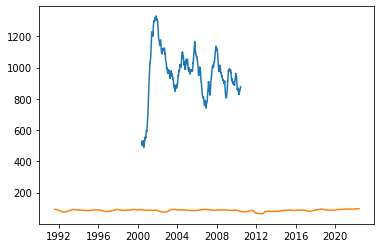

In [16]:
### ffmp requires deliveries to be less than 800 on annual average
plt.plot(deliveryNYC.sum(axis=1).rolling(365).mean())
plt.plot(deliveryNJ.sum(axis=1).rolling(365).mean())

### COmpare Trevor's predicted reservoir inflows with other datasets

In [17]:
pub = pd.read_csv('input_data/node_predicted_streamflows_10172022.csv', index_col=0)
pub.index = pd.to_datetime(pub.index)
pub.columns = [s.split('_')[1] for s in pub.columns]

### convert cms -> mgd
pub *= 22.82
pub.head()


beltzvilleCombined  merrillCreek  hopatcong  nockamixon  \
datetime                                                              
1999-01-01           29.276401      1.302231   5.232755    2.985466   
1999-01-02           30.501860      0.945623   4.783846    3.064245   
1999-01-03          276.816641      3.967749  22.227799    5.112115   
1999-01-04          313.038468      3.540966  21.538101   13.246732   
1999-01-05          158.407417      2.671311  18.300674   10.508014   

            assunpink  ontelaunee  blueMarsh  greenLane  marshCreek  \
datetime                                                              
1999-01-01   3.286727   38.294528  72.491682  27.734975    2.474186   
1999-01-02   3.148337   38.148179  73.332940  28.030987    2.391469   
1999-01-03   4.161756   71.788519  57.238089  52.915078    6.679740   
1999-01-04   4.716083   46.968799  87.105849  60.747629    6.802383   
1999-01-05   3.935756   52.607706  91.109351  48.624727    6.973790   

             delMontague  ...  cannonsville    pepacton   neversink  \
datetime                  ...                                         
1999-01-01    708.248621  ...    106.941666   11.253657    8.646540   
1999-01-02    806.458315  ...    106.564929   13.923877    7.993186   
1999-01-03  18279.834036  ...    375.539942  114.095052  174.112726   
1999-01-04   3720.177672  ...    238.989994  116.375746  139.129567   
1999-01-05   2717.078902  ...    357.875313  125.459764   48.929665   

            wallenpaupack    prompton  shoholaMarsh  mongaupeCombined  \
datetime                                                                
1999-01-01      83.533783    8.873578     38.470433        114.884204   
1999-01-02      93.921565   14.211734     13.409948        123.547233   
1999-01-03     363.959872  106.562049    106.013927        304.940333   
1999-01-04     362.417468  158.494647    110.353272        218.807219   
1999-01-05     293.465729   66.763923     58.466980        142.835282   

              fewalter  stillCreek  delLordville  
datetime                                          
1999-01-01   26.741828    2.019566    271.522218  
1999-01-02   46.902093    1.496869    315.232547  
1999-01-03  295.466220   21.745661   1531.725524  
1999-01-04  317.743122   21.729464   1520.430187  
1999-01-05  231.607089   12.800842   1275.778731  

[5 rows x 24 columns]

In [18]:
### subtract upstream reservoir components from link inflows
site_matches_link = [['delLordville', ['cannonsville', 'pepacton']],
                ['delMontague', ['prompton','wallenpaupack','delLordville', 'shoholaMarsh', 'mongaupeCombined', 'neversink']],
                ['delTrenton', ['delMontague', 'beltzvilleCombined', 'fewalter', 'merrillCreek', 'hopatcong', 'nockamixon']],
                ['outletAssunpink', ['assunpink']], ## note, should get downstream junction, just using reservoir-adjacent gage for now
                ['outletSchuylkill', ['ontelaunee', 'stillCreek', 'blueMarsh', 'greenLane']],
                ['outletChristina', ['marshCreek']] ## note, should use ['01481500, 01480015, 01479000, 01478000'], but dont have yet. so use marsh creek gage for now.
                ]
for downstream, upstreams in site_matches_link:
    for upstream in upstreams:
        pub[downstream] -= pub[upstream]
pub[pub < 0] = 0

pub.to_csv(f'input_data/inflows_PUB_10172022.csv')

(array([9.37458728e-04, 2.39835656e-04, 5.61883780e-05, 3.46002117e-05,
        1.33077737e-05, 4.43592458e-06, 2.07009814e-06, 2.36582644e-06,
        1.47864153e-06, 1.77436983e-06, 5.91456610e-07, 1.18291322e-06,
        2.95728305e-07, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.95728305e-07, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.95728305e-07]),
 array([    0.        ,   771.49947517,  1542.99895035,  2314.49842552,
         3085.99790069,  3857.49737587,  4628.99685104,  5400.49632621,
         6171.99580139,  6943.49527656,  7714.99475173,  8486.49422691,
         9257.99370208, 10029.49317725, 10800.99265243, 11572.4921276 ,
        12343.99160277, 13115.49107795, 13886.99055312, 14658.49002829,
        15429.98950347, 16201.48897864, 16972.98845381, 17744.48792899,
        18515.98740416, 19287.48687933]),
 <BarContainer object of 25 artists>)

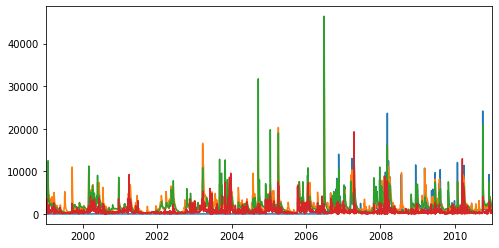

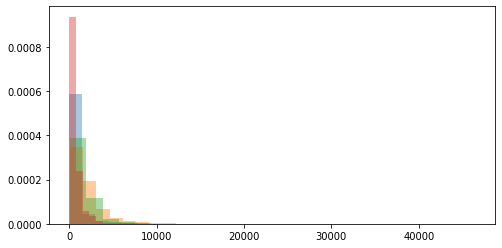

In [19]:
reservoir = 'delLordville'
bins = 25
figsize=(8,4)
start = pd.Timestamp('1999-01-01')
end = pd.Timestamp('2010-12-31')

plt.figure(figsize=figsize)
plt.plot(obs_inflow_0[reservoir])
plt.plot(nhm_inflow_0[reservoir])
plt.plot(nwm_inflow_0[reservoir])
plt.plot(pub[reservoir])
plt.xlim((start, end))
plt.figure(figsize=figsize)
plt.hist(obs_inflow_0[reservoir], alpha=0.4, density=True, bins=bins)
plt.hist(nhm_inflow_0[reservoir], alpha=0.4, density=True, bins=bins)
plt.hist(nwm_inflow_0[reservoir], alpha=0.4, density=True, bins=bins)
plt.hist(pub[reservoir], alpha=0.4, density=True, bins=bins)


### Stop here, rerun pywr model with data set to obs_scaled_2, dates set to 1/1/2008 - 12/31/2015

### explore pywr results

In [3]:
### load model results
import h5py
scenario = 0
### for each mainstem node, list [name, [flow gages to add], [upstream nodes to subtract]]
site_matches_link = [['delLordville', ['01427207'], ['cannonsville', 'pepacton']],
                     ['delMontague', ['01438500'], ['prompton','wallenpaupack','delLordville', 'shoholaMarsh', 'mongaupeCombined', 'neversink']],
                     ['delTrenton', ['01463500'], ['delMontague', 'beltzvilleCombined', 'fewalter', 'merrillCreek', 'hopatcong', 'nockamixon']],
                     ['outletAssunpink', ['01464000'], ['assunpink']],
                     ['outletSchuylkill', ['01474500'], ['ontelaunee', 'stillCreek', 'blueMarsh', 'greenLane']],
                     ['outletChristina', ['01481500', '+', '01480015', '+', '01479000', '+', '01478000'], ['marshCreek']] 
                    ]

with h5py.File('output_data/drb_output_nwmv21_withLakes.hdf5', 'r') as f:
    keys = list(f.keys())
    results = pd.DataFrame({keys[0]: f[keys[0]][:,scenario]})
    for k in keys[1:]:
        if 'catchment' in k or 'outflow' in k or 'reservoir' in k or 'delLordville' in k or 'delMontague' in k:
            results[k] = f[k][:,scenario]
    day = [f['time'][i][0] for i in range(len(f['time']))]
    month = [f['time'][i][2] for i in range(len(f['time']))]
    year = [f['time'][i][3] for i in range(len(f['time']))]
    date = [f'{y}-{m}-{d}' for y,m,d in zip(year, month, day)]
    date = pd.to_datetime(date)
    results.index = date
results

catchment_assunpink  catchment_beltzvilleCombined  \
1999-06-01             0.000000                     51.696807   
1999-06-02             0.000000                     51.344999   
1999-06-03             0.000000                     50.993191   
1999-06-04             0.000000                     50.603349   
1999-06-05             0.000000                     50.242032   
...                         ...                           ...   
2010-05-27             0.228200                     65.512415   
2010-05-28             0.370825                     65.027490   
2010-05-29             0.779683                     64.523549   
2010-05-30             0.228200                     63.972065   
2010-05-31             0.456400                     63.439599   

            catchment_blueMarsh  catchment_cannonsville  \
1999-06-01            33.022441              159.863605   
1999-06-02            31.710291              155.061897   
1999-06-03            30.902083              149.318863   
1999-06-04            29.580424              143.205005   
1999-06-05            29.209599              137.186230   
...                         ...                     ...   
2010-05-27            70.761015              269.627802   
2010-05-28            70.542323              254.680703   
2010-05-29            62.935657              242.994961   
2010-05-30            62.536307              227.524903   
2010-05-31            56.489007              214.346354   

            catchment_delLordville  catchment_delMontague  \
1999-06-01              416.854832            1083.303409   
1999-06-02              394.063358            1112.275300   
1999-06-03              373.126008            1114.224508   
1999-06-04              356.011009            1100.532509   
1999-06-05              342.803934            1081.915192   
...                            ...                    ...   
2010-05-27              535.005380            1894.059958   
2010-05-28              505.272822            1847.973067   
2010-05-29              486.579439            1839.177859   
2010-05-30              462.133515            1767.466010   
2010-05-31              444.695232            1692.454771   

            catchment_delTrenton  catchment_fewalter  catchment_greenLane  \
1999-06-01           2159.313927          153.141213            10.725400   
1999-06-02           2026.938913          150.554947            10.516216   
1999-06-03           1952.422106          148.149338            11.980500   
1999-06-04           1924.524657          145.905372            10.183425   
1999-06-05           1924.182357          143.471238             9.879158   
...                          ...                 ...                  ...   
2010-05-27           3228.725661          205.494095            23.400008   
2010-05-28           3242.493728          200.416646           122.705039   
2010-05-29           3269.174110          196.166421            14.424141   
2010-05-30           3250.471219          194.882796            13.111991   
2010-05-31           3058.935357          186.990879            12.807725   

            catchment_hopatcong  ...  reservoir_merrillCreek  \
1999-06-01             4.107600  ...            10629.484353   
1999-06-02             4.107600  ...             9469.463581   
1999-06-03             3.907925  ...             8477.833590   
1999-06-04             3.879400  ...             7627.865026   
1999-06-05             3.879400  ...             6899.320542   
...                         ...  ...                     ...   
2010-05-27             6.750917  ...             2516.968380   
2010-05-28             6.712883  ...             2515.878462   
2010-05-29             6.617800  ...             2514.944246   
2010-05-30             6.617800  ...             2514.143490   
2010-05-31             6.494192  ...             2513.457127   

            reservoir_mongaupeCombined  reservoir_neversink  \
1999-06-01                20134.

In [21]:
### get modeled & observed flows in same period as results
def get_matching_flows(results, dataset_inflow, dataset_original):
    ### get matching time period
    dataset_matched = dataset_inflow.loc[results.index]

    ### reset mainstem flows based on gage flow, without subtracting upstream reservoirs
    for node, sites, upstreams in site_matches_link[:3]:
        dataset_matched[node] = dataset_original.loc[:, sites].sum(axis=1)

    return dataset_matched

obs_matched = get_matching_flows(results, obs_inflow_0, obs)
nhm_matched = get_matching_flows(results, nhm_inflow_0, nhm)
nwm_matched = get_matching_flows(results, nwm_inflow_0, nwm)
obs_outflow_matched = get_matching_flows(results, obs_inflow_0, obs)

obs_outflow_matched

cannonsville   pepacton  neversink  wallenpaupack   prompton  \
1999-06-01    126.653326  55.572378  42.648569      31.663332  31.663332   
1999-06-02    186.749037  61.388092  42.648569      28.432379  28.432379   
1999-06-03    151.208563  60.095711  38.125236      25.847618  25.847618   
1999-06-04    113.729517  59.449520  34.894284      24.555237  24.555237   
1999-06-05    113.083327  60.095711  37.479045      22.616665  22.616665   
...                  ...        ...        ...            ...        ...   
2010-05-27    174.471419  76.896662  56.800140      27.915427  27.915427   
2010-05-28    175.117609  76.896662  56.670902      26.881522  26.881522   
2010-05-29    175.763799  76.896662  56.735521      25.912237  25.912237   
2010-05-30    175.763799  76.250472  56.606282      25.330665  25.330665   
2010-05-31    176.409990  76.896662  57.058616      24.361380  24.361380   

            shoholaMarsh  mongaupeCombined  beltzvilleCombined    fewalter  \
1999-06-01     31.663332               NaN           36.832855  102.744280   
1999-06-02     28.432379               NaN           36.832855  112.437136   
1999-06-03     25.847618               NaN           36.832855  118.252850   
1999-06-04     24.555237               NaN           36.832855  118.252850   
1999-06-05     22.616665               NaN           36.832855  101.451899   
...                  ...               ...                 ...         ...   
2010-05-27     27.915427               NaN           98.220947  162.839991   
2010-05-28     26.881522               NaN           76.250472  162.839991   
2010-05-29     25.912237               NaN           67.849996  313.402363   
2010-05-30     25.330665               NaN           67.849996  313.402363   
2010-05-31     24.361380               NaN           67.849996  130.530469   

            merrillCreek  ...  stillCreek  blueMarsh   greenLane  marshCreek  \
1999-06-01     10.985237  ...   23.909046  60.095711   91.112852   10.339047   
1999-06-02     10.339047  ...   22.616665  58.157140   91.112852    9.692857   
1999-06-03      9.692857  ...   21.324284  58.157140   96.928566    9.046666   
1999-06-04      9.692857  ...   19.385713  56.218568   94.989995    8.400476   
1999-06-05      7.754285  ...   18.093332  54.279997   86.589519    5.040285   
...                  ...  ...         ...        ...         ...         ...   
2010-05-27     24.296761  ...   26.881522  98.867137   94.343804   12.019142   
2010-05-28     26.106094  ...   36.832855  98.867137  163.486181   12.665333   
2010-05-29     23.198237  ...   44.651759  98.867137  111.790946   12.083761   
2010-05-30     21.647380  ...   44.134807  98.867137  135.699992   15.508571   
2010-05-31     19.773427  ...   42.066998  98.867137  105.975232   17.834856   

            delLordville  delMontague   delTrenton  outletAssunpink  \
1999-06-01      0.000000  1828.718943  3831.909305        15.508571   
1999-06-02      0.000000  1873.952274  3463.580754        13.569999   
1999-06-03      0.000000  1744.714186  3418.347424        11.631428   
1999-06-04      0.000000  1621.938002  3282.647431        10.339047   
1999-06-05      0.000000  1395.771349  3095.252204         9.046666   
...                  ...          ...          ...              ...   
2010-05-27    539.569017  1867.490369  3844.833113        19.708808   
2010-05-28    545.384731  1764.099899  4335.937847        20.161142   
2010-05-29    564.124253  1525.009437  4180.852142        20.096523   
2010-05-30    511.782828  1453.928488  3870.680731        19.644189   
2010-05-31    478.180925  1576.704672  3799.599783        24.361380   

            outletSchuylkill  outletChristina  
1999-06-01        600.310918        10.339047  
1999-06-02        545.384731         9.692857  
1999-06-03        567.355206         9.046666  
1999-06-04        613.880917         8.400476  
1999-06-05        567.355206         5.040285  
...                      ...              ...  
2010-05-27  

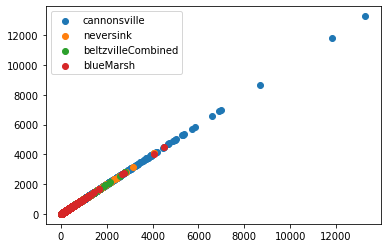

In [22]:
### compare catchment inflows to NHM estimates
reservoirs = ['cannonsville', 'neversink', 'beltzvilleCombined', 'blueMarsh']
for reservoir in reservoirs:
    plt.scatter(results[f'catchment_{reservoir}'], nhm_matched[reservoir], label=reservoir)
plt.legend()

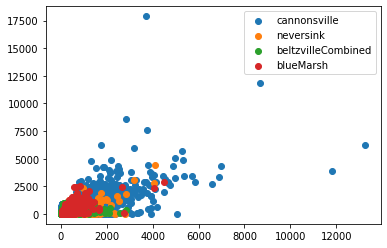

In [23]:
### compare catchment inflows to observed outflows
reservoirs = ['cannonsville', 'neversink', 'beltzvilleCombined', 'blueMarsh']
for reservoir in reservoirs:
    plt.scatter(results[f'catchment_{reservoir}'], obs_outflow_matched[reservoir], label=reservoir)
plt.legend()

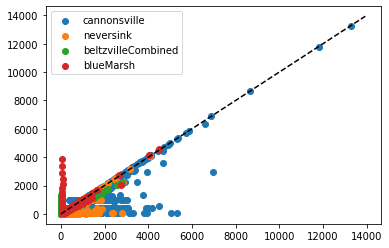

In [24]:
### compare catchment to outflow
fig, ax = plt.subplots(1)
for reservoir in reservoirs:
    plt.scatter(results[f'catchment_{reservoir}'], results[f'outflow_{reservoir}'], label=reservoir)
max_axis = max(ax.get_xlim()[1], ax.get_ylim()[1])
ax.plot([0, max_axis], [0, max_axis], color='k', ls='--')
plt.legend()

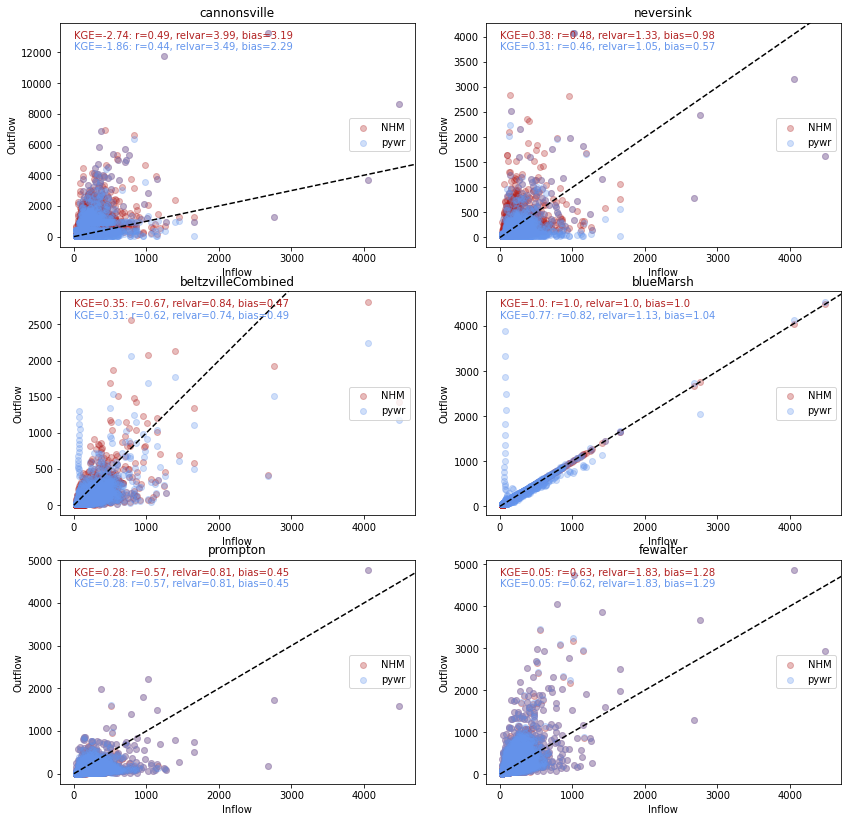

In [25]:
import hydroeval as he

### compare catchment inflows to observed, for nhm vs pywr
fig, axs = plt.subplots(3,2,figsize=(14,14))

sites = ['cannonsville', 'neversink', 'beltzvilleCombined', 'blueMarsh',  'prompton', 'fewalter']
for i, site in enumerate(sites):
    row = 0 if i < 2 else 1 if i < 4 else 2
    col = 0 if i%2 == 0 else 1 
    col 
    ax = axs[row, col]
    prefix = 'outflow' 
    ax.scatter(results[f'catchment_{reservoir}'], nhm_matched[site], label='NHM', alpha=0.3, color='firebrick')
    ax.scatter(results[f'catchment_{reservoir}'], results[f'{prefix}_{site}'], label='pywr', alpha=0.3, color='cornflowerblue')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    max_axis = max(xlim[1], ylim[1])
    ax.plot([0, max_axis], [0, max_axis], color='k', ls='--')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
#     corr_nhm = corrcoef_nan_masked(results[f"catchment_{reservoir}"], nhm_matched[site])
#     nse_nhm = nse(results[f"catchment_{reservoir}"], nhm_matched[site])
#     corr_pywr = corrcoef_nan_masked(results[f"catchment_{reservoir}"], results[f"{prefix}_{site}"])
#     nse_pywr = nse(results[f"catchment_{reservoir}"], results[f"{prefix}_{site}"])
    kge_nhm, r_nhm, alpha_nhm, beta_nhm = he.evaluator(he.kge, nhm_matched[site], results[f"catchment_{reservoir}"])
    kge_pywr, r_pywr, alpha_pywr, beta_pywr = he.evaluator(he.kge, results[f"{prefix}_{site}"], results[f"catchment_{reservoir}"])
    kge_nhm, r_nhm, alpha_nhm, beta_nhm = round(kge_nhm[0], 2), round(r_nhm[0], 2), round(alpha_nhm[0], 2), round(beta_nhm[0], 2)
    kge_pywr, r_pywr, alpha_pywr, beta_pywr = round(kge_pywr[0], 2), round(r_pywr[0], 2), round(alpha_pywr[0], 2), round(beta_pywr[0], 2)
    
    
#     ax.annotate(f'r = {corr_nhm}, {nse_nhm}',
#                     xy = (0.04,0.93), xycoords=ax.transAxes, color = 'firebrick')
#     ax.annotate(f'r = {corr_pywr}, {nse_pywr}',
#                     xy = (0.04,0.88), xycoords=ax.transAxes, color = 'cornflowerblue')
    ax.annotate(f'KGE={kge_nhm}: r={r_nhm}, relvar={alpha_nhm}, bias={beta_nhm}',
                    xy = (0.04,0.93), xycoords=ax.transAxes, color = 'firebrick')
    ax.annotate(f'KGE={kge_pywr}: r={r_pywr}, relvar={alpha_pywr}, bias={beta_pywr}',
                    xy = (0.04,0.88), xycoords=ax.transAxes, color = 'cornflowerblue')
    ax.legend(loc='right')
    ax.set_xlabel('Inflow')
    ax.set_ylabel('Outflow')
    ax.set_title(site)


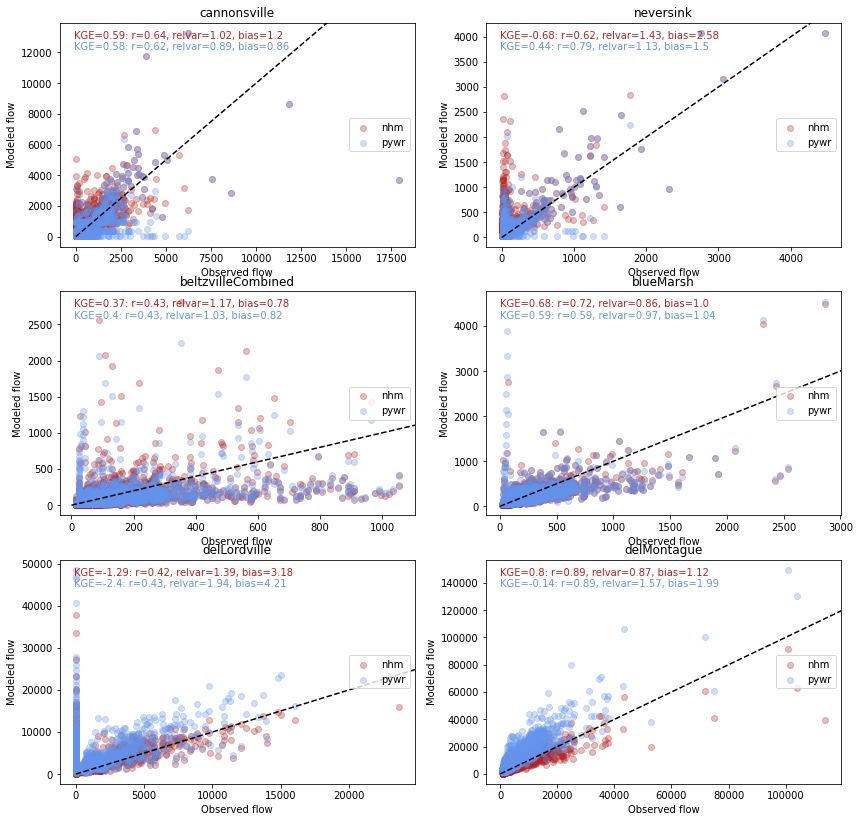

In [26]:

### compare observed flows to pywr output & nhm estimate 
fig, axs = plt.subplots(3,2,figsize=(14,14))

sites = ['cannonsville', 'neversink', 'beltzvilleCombined', 'blueMarsh', 'delLordville', 'delMontague']
# sites = ['pepacton', 'mongaupeCombined', 'prompton', 'fewalter']
for i, site in enumerate(sites):
    row = 0 if i < 2 else 1 if i < 4 else 2
    col = 0 if i%2 == 0 else 1 
    col 
    ax = axs[row, col]
    prefix = 'outflow' if i < 4 else 'link'
    ax.scatter(obs_outflow_matched[site], nhm_matched[site], label='nhm', alpha=0.3, color='firebrick')
    ax.scatter(obs_outflow_matched[site], results[f'{prefix}_{site}'], label='pywr', alpha=0.3, color='cornflowerblue')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    max_axis = max(xlim[1], ylim[1])
    ax.plot([0, max_axis], [0, max_axis], color='k', ls='--')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
    kge_nhm, r_nhm, alpha_nhm, beta_nhm = he.evaluator(he.kge, nhm_matched[site], obs_outflow_matched[site])
    kge_pywr, r_pywr, alpha_pywr, beta_pywr = he.evaluator(he.kge, results[f"{prefix}_{site}"], obs_outflow_matched[site])
    kge_nhm, r_nhm, alpha_nhm, beta_nhm = round(kge_nhm[0], 2), round(r_nhm[0], 2), round(alpha_nhm[0], 2), round(beta_nhm[0], 2)
    kge_pywr, r_pywr, alpha_pywr, beta_pywr = round(kge_pywr[0], 2), round(r_pywr[0], 2), round(alpha_pywr[0], 2), round(beta_pywr[0], 2)
    
    ax.annotate(f'KGE={kge_nhm}: r={r_nhm}, relvar={alpha_nhm}, bias={beta_nhm}',
                    xy = (0.04,0.93), xycoords=ax.transAxes, color = 'firebrick')
    ax.annotate(f'KGE={kge_pywr}: r={r_pywr}, relvar={alpha_pywr}, bias={beta_pywr}',
                    xy = (0.04,0.88), xycoords=ax.transAxes, color = 'cornflowerblue')
    ax.legend(loc='right')
    ax.set_xlabel('Observed flow')
    ax.set_ylabel('Modeled flow')
    ax.set_title(site)


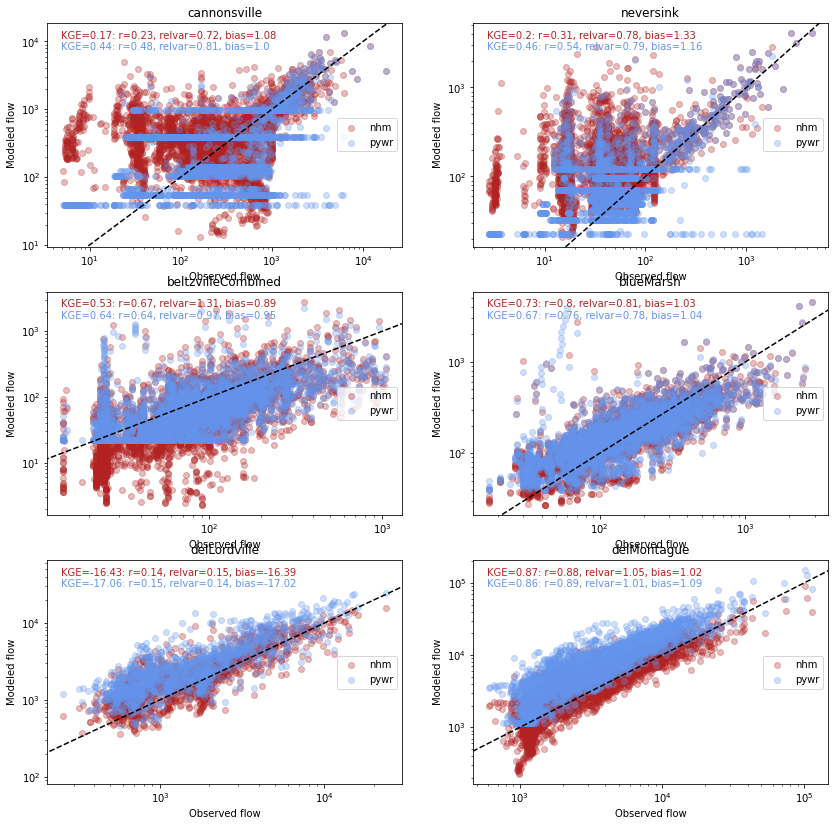

In [27]:

### compare observed flows to pywr output & nhm estimate , log scale
fig, axs = plt.subplots(3,2,figsize=(14,14))

sites = ['cannonsville', 'neversink', 'beltzvilleCombined', 'blueMarsh', 'delLordville', 'delMontague']
# sites = ['pepacton', 'mongaupeCombined', 'prompton', 'fewalter']
for i, site in enumerate(sites):
    row = 0 if i < 2 else 1 if i < 4 else 2
    col = 0 if i%2 == 0 else 1 
    col 
    ax = axs[row, col]
    prefix = 'outflow' if i < 4 else 'link'
    ax.scatter(obs_outflow_matched[site], nhm_matched[site], label='nhm', alpha=0.3, color='firebrick')
    ax.scatter(obs_outflow_matched[site], results[f'{prefix}_{site}'], label='pywr', alpha=0.3, color='cornflowerblue')
    ax.loglog()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    max_axis = max(xlim[1], ylim[1])
    ax.plot([0, max_axis], [0, max_axis], color='k', ls='--')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    kge_nhm, r_nhm, alpha_nhm, beta_nhm = he.evaluator(he.kge, np.log(nhm_matched[site]+0.01), np.log(obs_outflow_matched[site]+0.01))
    kge_pywr, r_pywr, alpha_pywr, beta_pywr = he.evaluator(he.kge, np.log(results[f"{prefix}_{site}"]+0.01), np.log(obs_outflow_matched[site]+0.01))
    kge_nhm, r_nhm, alpha_nhm, beta_nhm = round(kge_nhm[0], 2), round(r_nhm[0], 2), round(alpha_nhm[0], 2), round(beta_nhm[0], 2)
    kge_pywr, r_pywr, alpha_pywr, beta_pywr = round(kge_pywr[0], 2), round(r_pywr[0], 2), round(alpha_pywr[0], 2), round(beta_pywr[0], 2)
    
    ax.annotate(f'KGE={kge_nhm}: r={r_nhm}, relvar={alpha_nhm}, bias={beta_nhm}',
                    xy = (0.04,0.93), xycoords=ax.transAxes, color = 'firebrick')
    ax.annotate(f'KGE={kge_pywr}: r={r_pywr}, relvar={alpha_pywr}, bias={beta_pywr}',
                    xy = (0.04,0.88), xycoords=ax.transAxes, color = 'cornflowerblue')
    ax.legend(loc='right')
    ax.set_xlabel('Observed flow')
    ax.set_ylabel('Modeled flow')
    ax.set_title(site)


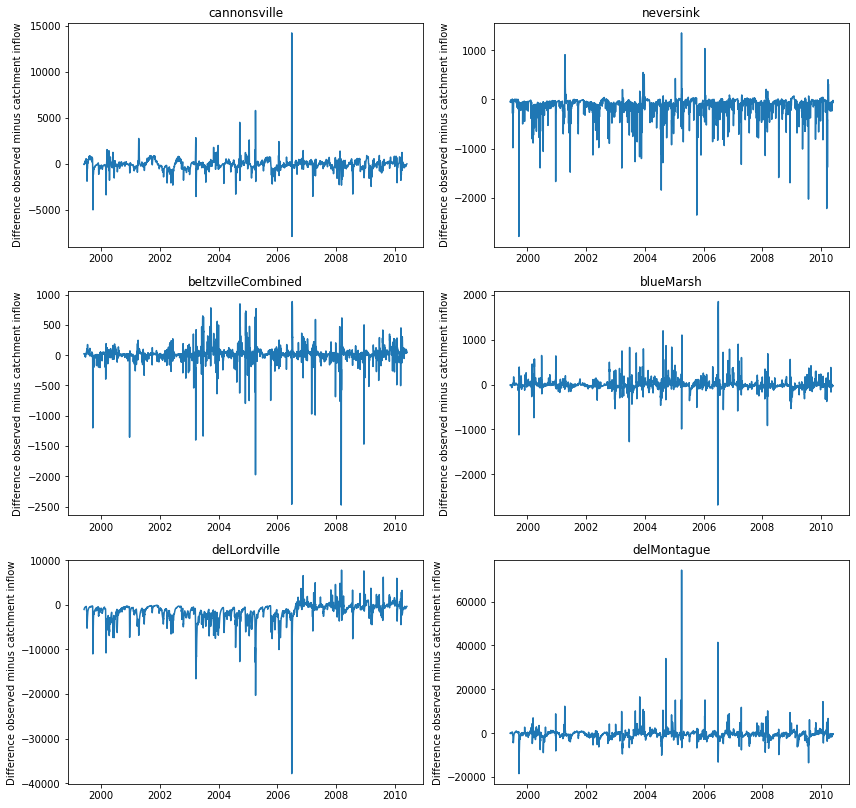

In [28]:
### compare pywr output to catchment inflow
fig, axs = plt.subplots(3,2,figsize=(14,14))

sites = ['cannonsville', 'neversink', 'beltzvilleCombined', 'blueMarsh', 'delLordville', 'delMontague']
for i, site in enumerate(sites):
    row = 0 if i < 2 else 1 if i < 4 else 2
    col = 0 if i%2 == 0 else 1 
    col 
    ax = axs[row, col]
    prefix = 'outflow' if i < 4 else 'link'
    ax.plot(obs_outflow_matched[site] - results[f'catchment_{site}'], )
    ax.set_ylabel('Difference observed minus catchment inflow')
    ax.set_title(site)


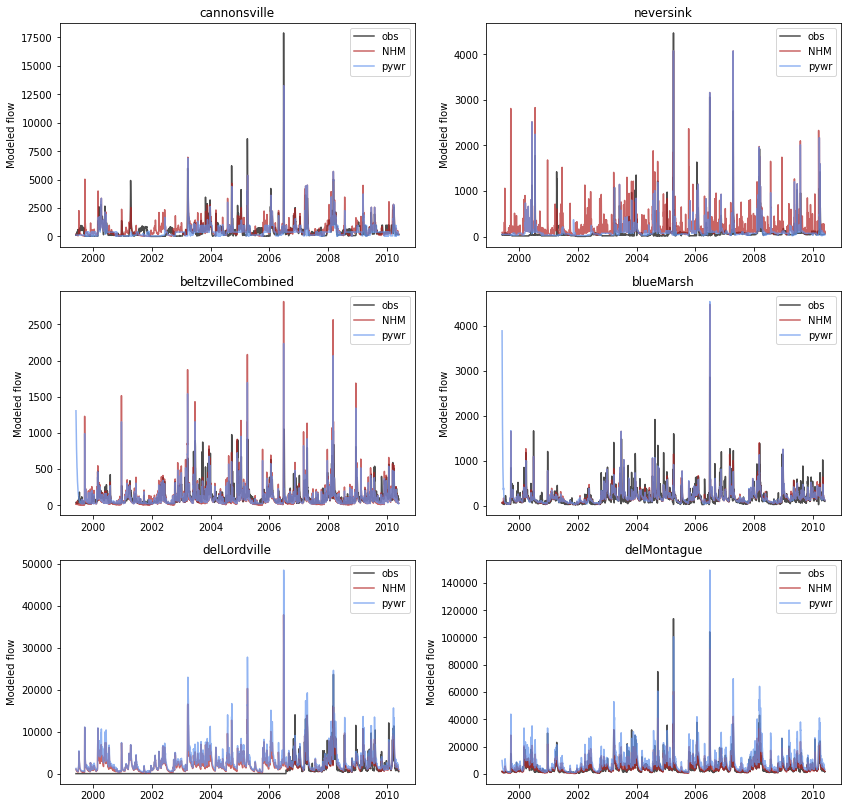

In [29]:
### compare NHM to observed, and pywr to observed
fig, axs = plt.subplots(3,2,figsize=(14,14))

sites = ['cannonsville', 'neversink', 'beltzvilleCombined', 'blueMarsh', 'delLordville', 'delMontague']
for i, site in enumerate(sites):
    row = 0 if i < 2 else 1 if i < 4 else 2
    col = 0 if i%2 == 0 else 1 
    col 
    ax = axs[row, col]
    prefix = 'outflow' if i < 4 else 'link'
    ax.plot(obs_outflow_matched[site], label='obs', alpha=0.7, color='k')
    ax.plot(nhm_matched[site], label='NHM', alpha=0.7, color='firebrick')
    ax.plot(results[f'{prefix}_{site}'], label='pywr', alpha=0.7, color='cornflowerblue')
    ax.legend()
    ax.set_ylabel('Modeled flow')
    ax.set_title(site)


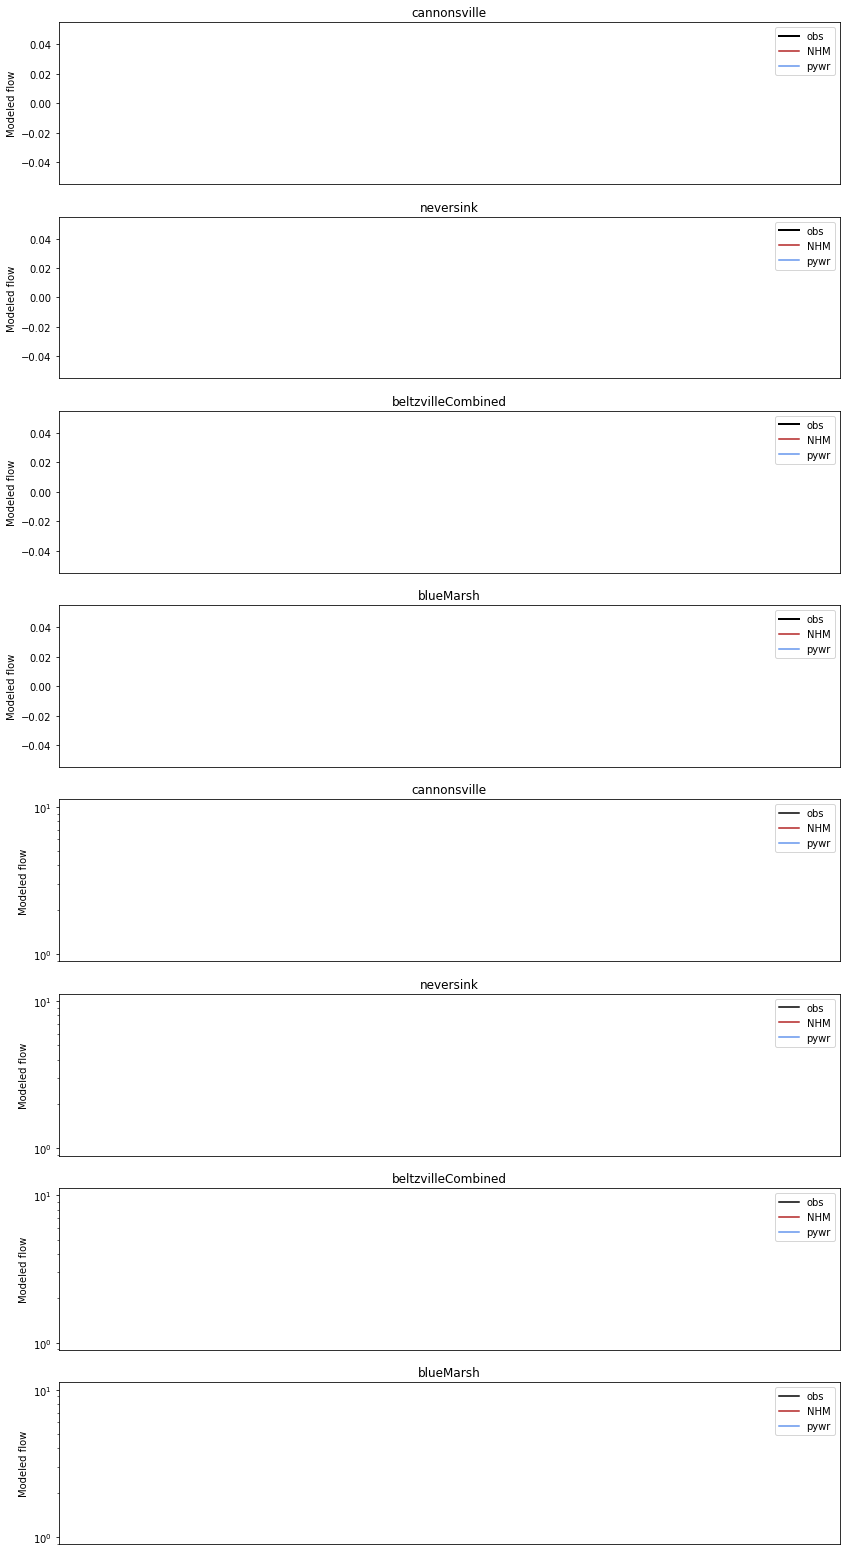

In [30]:
### compare NHM to observed, and pywr to observed
sites = ['cannonsville', 'neversink', 'beltzvilleCombined', 'blueMarsh']
fig, axs = plt.subplots(len(sites)*2,figsize=(14,28))

start_year = 2011
end_year = 2012
for i, site in enumerate(sites):
    ax = axs[i]
    prefix = 'outflow' 
    year_bool = np.logical_and(obs_outflow_matched.index.year >= start_year, obs_outflow_matched.index.year <= end_year)
    ax.plot(obs_outflow_matched[site].loc[year_bool], label='obs', alpha=1, lw=2, color='k')
    ax.plot(nhm_matched[site].loc[year_bool], label='NHM', alpha=1, color='firebrick')
    ax.plot(results[f'{prefix}_{site}'].loc[year_bool], label='pywr', alpha=1, color='cornflowerblue')
    ax.legend()
    ax.set_ylabel('Modeled flow')
    ax.set_title(site)
    ax.set_xticks([])
for i, site in enumerate(sites):
    ax = axs[i+len(sites)]
    prefix = 'outflow' 
    year_bool = np.logical_and(obs_outflow_matched.index.year >= start_year, obs_outflow_matched.index.year <= end_year)
    ax.plot(obs_outflow_matched[site].loc[year_bool], label='obs', alpha=1, color='k')
    ax.plot(nhm_matched[site].loc[year_bool], label='NHM', alpha=1, color='firebrick')
    ax.plot(results[f'{prefix}_{site}'].loc[year_bool], label='pywr', alpha=1, color='cornflowerblue')
    ax.semilogy()
    ax.legend()
    ax.set_ylabel('Modeled flow')
    ax.set_title(site)
    ax.set_xticks([])
    

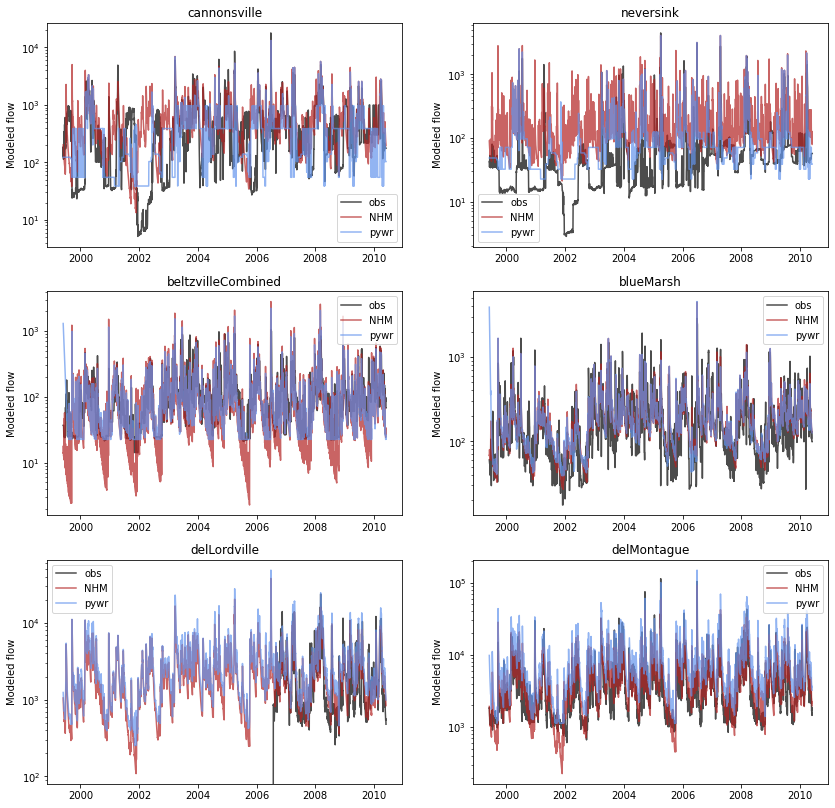

In [31]:
### compare NHM to observed, and pywr to observed, log scale
fig, axs = plt.subplots(3,2,figsize=(14,14))

sites = ['cannonsville', 'neversink', 'beltzvilleCombined', 'blueMarsh', 'delLordville', 'delMontague']
for i, site in enumerate(sites):
    row = 0 if i < 2 else 1 if i < 4 else 2
    col = 0 if i%2 == 0 else 1 
    col 
    ax = axs[row, col]
    prefix = 'outflow' if i < 4 else 'link'
    ax.plot(obs_outflow_matched[site], label='obs', alpha=0.7, color='k')
    ax.plot(nhm_matched[site], label='NHM', alpha=0.7, color='firebrick')
    ax.plot(results[f'{prefix}_{site}'], label='pywr', alpha=0.7, color='cornflowerblue')
    ax.semilogy()
    ax.legend()
    ax.set_ylabel('Modeled flow')
    ax.set_title(site)


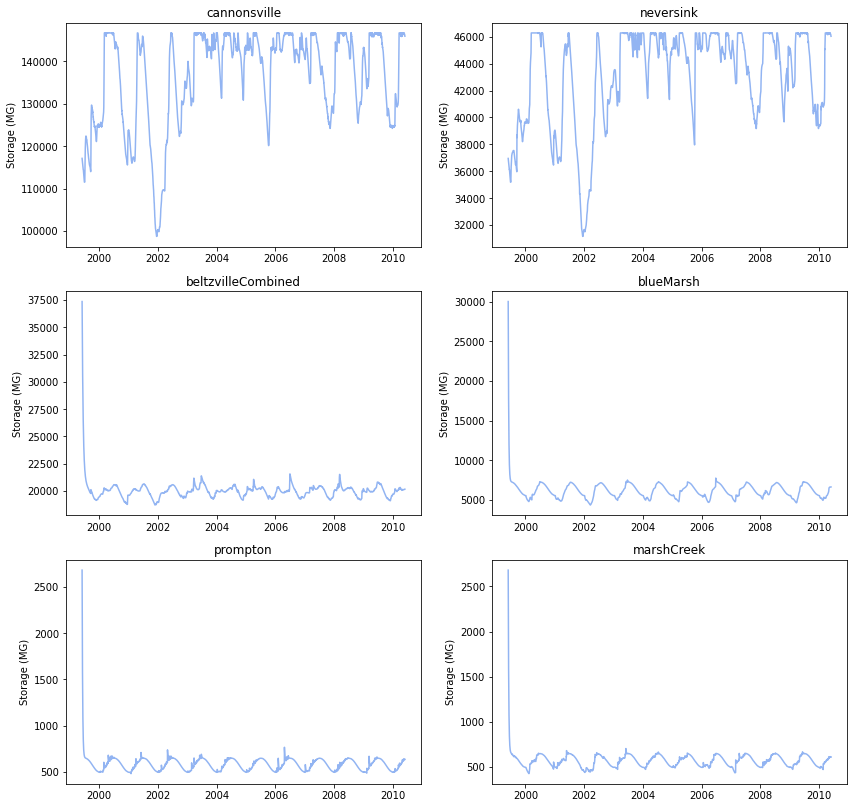

In [32]:
### plot storages
fig, axs = plt.subplots(3,2,figsize=(14,14))

sites = ['cannonsville', 'neversink', 'beltzvilleCombined', 'blueMarsh', 'prompton', 'marshCreek']
for i, site in enumerate(sites):
    row = 0 if i < 2 else 1 if i < 4 else 2
    col = 0 if i%2 == 0 else 1 
    col 
    ax = axs[row, col]
    ax.plot(results[f'reservoir_{site}'], alpha=0.7, color='cornflowerblue')
    ax.set_ylabel('Storage (MG)')
    ax.set_title(site)


### Compare obs vs NHM vs NWM vs WEAP vs pywr

In [33]:
### Look at pywr run with 4 diff inputs (NHM, NWM, WEAP, PUB) vs original over 1999-2010 period
import h5py

def get_hdf5_results(filename):
    with h5py.File(filename, 'r') as f:
        keys = list(f.keys())
        results = pd.DataFrame({keys[0]: f[keys[0]][:,scenario]})
        for k in keys[1:]:
            if 'catchment' in k or 'outflow' in k or 'reservoir' in k or 'delLordville' in k or 'delMontague' in k or 'delTrenton' in k\
                or ('link' in k and 'nyc' in k) or 'factor_combined' in k or 'drought_level' in k or k == 'delivery_nj':
                results[k] = f[k][:,scenario]
        day = [f['time'][i][0] for i in range(len(f['time']))]
        month = [f['time'][i][2] for i in range(len(f['time']))]
        year = [f['time'][i][3] for i in range(len(f['time']))]
        date = [f'{y}-{m}-{d}' for y,m,d in zip(year, month, day)]
        date = pd.to_datetime(date)
        results.index = date
    return results

input_dict = {'nhm_pywr': 'nhmv10_noScaled', 'nwm_pywr': 'nwmv21_noScaled', 'weap_nhm_pywr': 'WEAP_23Aug2022_gridmet_nhmv10_noScaled', 'pub_pywr': 'PUB_10172022'}
results_dict = {i: get_hdf5_results(f'output_data/drb_output_{input_dict[i]}.hdf5') for i in input_dict}    
results_dict['obs'] = obs_matched
results_dict['nhm'] = nhm_matched
results_dict['nwm'] = nwm_matched
results_dict['weap'] = flow
results_dict['pub'] = pub.loc[obs_matched.index]

In [34]:
reservoir = 'pepacton'


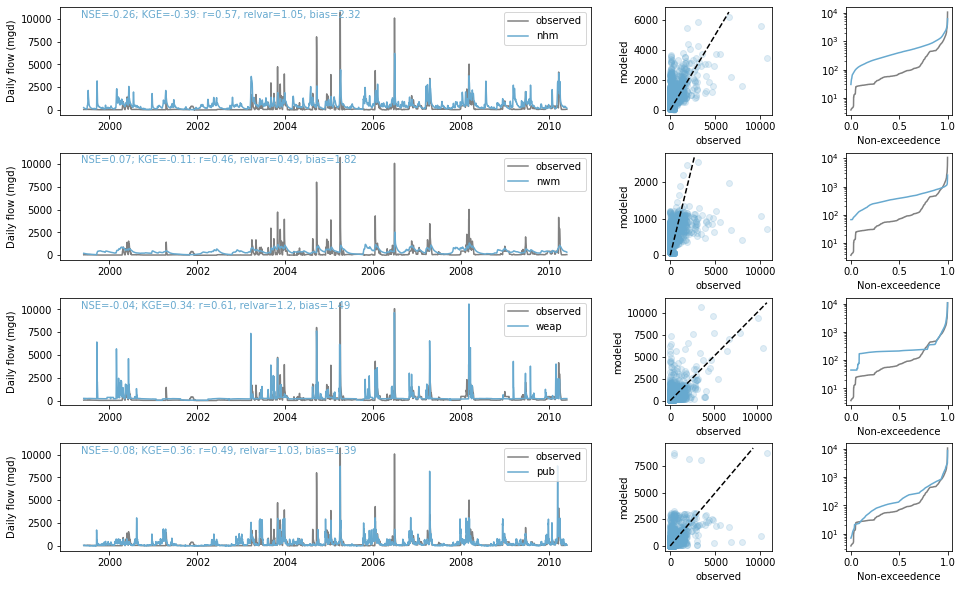

In [35]:
### plot pywr driven with three inflow estimates: NHM, NWM, WEAP, PUB
uselog = False
usepywr = False
usekge = True
colors = ['0.5', '#67a9cf', '#ef8a62']

fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(4,3,  width_ratios=(5,1,1), wspace=0.3, hspace=0.35)
obs = results_dict['obs'][reservoir]
# axs[0].set_title(reservoir)
for i, d in enumerate(('nhm','nhm_pywr','nwm','nwm_pywr','weap', 'weap_nhm_pywr','pub','pub_pywr')): 
    if usepywr or i % 2 == 0:
        ### first plot time series of observed vs modeled
        row = int(i/2)
        color = colors[i % 2 +1]
        if i % 2 == 0:
            ax = fig.add_subplot(gs[row,0])
        try:
            modeled = results_dict[d][f'outflow_{reservoir}']
        except:
            try:
                modeled = results_dict[d][f'link_{reservoir}']
            except:
                try:
                    modeled = results_dict[d][reservoir]
                except:
                    modeled = results_dict['obs'][reservoir] * 0
        if i % 2 == 0:
            ax.plot(obs, label='observed', color=colors[0])
        ax.plot(modeled, label=d, color=color)

        if usekge:
            if uselog:
                kge, r, alpha, beta = he.evaluator(he.kge, np.log(modeled+0.01), np.log(obs+0.01))
                nse = he.evaluator(he.nse, np.log(modeled+0.01), np.log(obs+0.01))
            else:
                kge, r, alpha, beta = he.evaluator(he.kge, modeled, obs)
                nse = he.evaluator(he.nse, modeled, obs)


            nse, kge, r, alpha, beta = round(nse[0], 2), round(kge[0], 2), round(r[0], 2), round(alpha[0], 2), round(beta[0], 2)
            if i%2 == 0:
                ax.annotate(f'NSE={nse}; KGE={kge}: r={r}, relvar={alpha}, bias={beta}', xy = (0.04,0.90), xycoords=ax.transAxes, color=color)
            else:
                ax.annotate(f'NSE={nse}; KGE={kge}: r={r}, relvar={alpha}, bias={beta}', xy = (0.04,0.80), xycoords=ax.transAxes, color=color)
        ax.legend(loc='upper right')
        ax.set_ylabel('Daily flow (mgd)')
        if uselog:
            ax.semilogy()
        
for i, d in enumerate(('nhm','nhm_pywr','nwm','nwm_pywr','weap', 'weap_nhm_pywr','pub','pub_pywr')): 
    if usepywr or i % 2 == 0:
        ### now add scatter of observed vs modeled
        row = int(i/2)
        color = colors[i % 2 +1]
        if i % 2 == 0:
            ax = fig.add_subplot(gs[row,1])
        try:
            modeled = results_dict[d][f'outflow_{reservoir}']
        except:
            try:
                modeled = results_dict[d][f'link_{reservoir}']
            except:
                try:
                    modeled = results_dict[d][reservoir]
                except:
                    modeled = results_dict['obs'][reservoir] * 0
        ax.scatter(obs, modeled, alpha=0.2, zorder=2, color=color)
        if i % 2 == 1 or not usepywr:
            diagmax = min(ax.get_xlim()[1], ax.get_ylim()[1])
            ax.plot([0, diagmax], [0, diagmax], color='k', ls='--')
        if uselog:
            ax.loglog()
        ax.set_xlabel('observed')
        ax.set_ylabel('modeled')            
    
    
for i, d in enumerate(('nhm','nhm_pywr','nwm','nwm_pywr','weap', 'weap_nhm_pywr','pub','pub_pywr')): 
    ### now add exceedance plot
    if usepywr or i % 2 == 0:
        def plot_exceedance(data, ax, color, **kwargs):
            df = data.sort_values()
            exceedance = np.arange(1.,len(df) + 1.)/len(df)
            ax.plot(exceedance, df, color=color, **kwargs)
        row = int(i/2)
        color = colors[i % 2 +1]
        if i % 2 == 0:
            ax = fig.add_subplot(gs[row,2])
        try:
            modeled = results_dict[d][f'outflow_{reservoir}']
        except:
            try:
                modeled = results_dict[d][f'link_{reservoir}']
            except:
                try:
                    modeled = results_dict[d][reservoir]
                except:
                    modeled = results_dict['obs'][reservoir] * 0

        if i % 2 == 0:
            plot_exceedance(obs, ax, colors[0])
            ax.semilogy()
            ax.set_xlabel('Non-exceedence')

        plot_exceedance(modeled, ax, color)


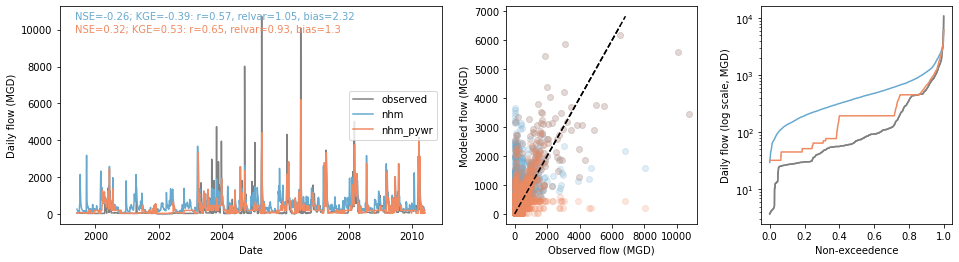

In [36]:
### plot 2 inflow estimates: NHM, NWM
uselog = False
use2nd = True
colors = ['0.5', '#67a9cf', '#ef8a62']
models = ('nhm','nhm_pywr')
fig = plt.figure(figsize=(16, 4))
gs = fig.add_gridspec(1,3,  width_ratios=(2,1,1), wspace=0.25, hspace=0.3)
obs = results_dict['obs'][reservoir]
# axs[0].set_title(reservoir)
ax = fig.add_subplot(gs[0,0])
for i, d in enumerate(models): 
    if use2nd or i == 0:
        ### first plot time series of observed vs modeled
        color = colors[i+1]
        try:
            modeled = results_dict[d][f'outflow_{reservoir}']
        except:
            try:
                modeled = results_dict[d][f'link_{reservoir}']
            except:
                try:
                    modeled = results_dict[d][reservoir]
                except:
                    modeled = results_dict['obs'][reservoir] * 0
        if i==0:
            ax.plot(obs, label='observed', color=colors[0])
        ax.plot(modeled, label=d, color=color)

        if uselog:
            kge, r, alpha, beta = he.evaluator(he.kge, np.log(modeled+0.01), np.log(obs+0.01))
            nse = he.evaluator(he.nse, np.log(modeled+0.01), np.log(obs+0.01))
        else:
            kge, r, alpha, beta = he.evaluator(he.kge, modeled, obs)
            nse = he.evaluator(he.nse, modeled, obs)

        nse, kge, r, alpha, beta = round(nse[0], 2), round(kge[0], 2), round(r[0], 2), round(alpha[0], 2), round(beta[0], 2)
        if i==0:
            coords = (0.04, 0.94)
        else:
            coords = (0.04, 0.88)
        ax.annotate(f'NSE={nse}; KGE={kge}: r={r}, relvar={alpha}, bias={beta}', xy = coords, xycoords=ax.transAxes, color=color)
        ax.legend(loc='right')
        ax.set_ylabel('Daily flow (MGD)')
        ax.set_xlabel('Date')
        if uselog:
            ax.semilogy()

ax = fig.add_subplot(gs[0,1])        
for i, d in enumerate(models): 
    ### now add scatter of observed vs modeled
    if use2nd or i == 0:
        color = colors[i+1]
        try:
            modeled = results_dict[d][f'outflow_{reservoir}']
        except:
            try:
                modeled = results_dict[d][f'link_{reservoir}']
            except:
                try:
                    modeled = results_dict[d][reservoir]
                except:
                    modeled = results_dict['obs'][reservoir] * 0
        ax.scatter(obs, modeled, alpha=0.2, zorder=2, color=color)
        diagmax = min(ax.get_xlim()[1], ax.get_ylim()[1])
        ax.plot([0, diagmax], [0, diagmax], color='k', ls='--')
        if uselog:
            ax.loglog()
        ax.set_xlabel('Observed flow (MGD)')
        ax.set_ylabel('Modeled flow (MGD)')            
    
ax = fig.add_subplot(gs[0,2])
for i, d in enumerate(models): 
    if use2nd or i==0:
        ### now add exceedance plot
        def plot_exceedance(data, ax, color, **kwargs):
            df = data.sort_values()
            exceedance = np.arange(1.,len(df) + 1.)/len(df)
            ax.plot(exceedance, df, color=color, **kwargs)

        color = colors[i+1]
        try:
            modeled = results_dict[d][f'outflow_{reservoir}']
        except:
            try:
                modeled = results_dict[d][f'link_{reservoir}']
            except:
                try:
                    modeled = results_dict[d][reservoir]
                except:
                    modeled = results_dict['obs'][reservoir] * 0

        plot_exceedance(obs, ax, colors[0])
        ax.semilogy()
        ax.set_xlabel('Non-exceedence')
        ax.set_ylabel('Daily flow (log scale, MGD)')

        plot_exceedance(modeled, ax, color)

if use2nd:
    plt.savefig(figdir + f'streamflow_3plots_Nhm{models[1]}.png', bbox_inches='tight')
else:
    plt.savefig(figdir + 'streamflow_3plots_Nhm.png', bbox_inches='tight')    

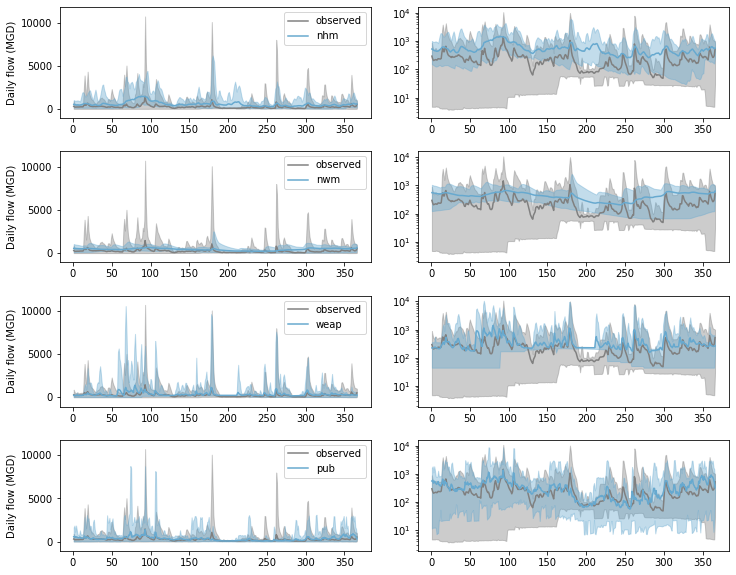

In [37]:
### seasonal (daily) distributions for: NHM, NWM, WEAP, PUB
uselog = False

fig = plt.figure(figsize=(12, 10))
gs = fig.add_gridspec(4,2, wspace=0.15, hspace=0.3)
obs = results_dict['obs'][reservoir]

obs_resample = obs.resample('D').sum()
ymax = obs_resample.groupby(obs_resample.index.dayofyear).max().max()
ymin = obs_resample.groupby(obs_resample.index.dayofyear).min().min()
for i, d in enumerate(('nhm','nhm_pywr','nwm','nwm_pywr','weap', 'weap_nhm_pywr','pub','pub_pywr')): 
    try:
        modeled = results_dict[d][f'outflow_{reservoir}']
    except:
        try:
            modeled = results_dict[d][f'link_{reservoir}']
        except:
            try:
                modeled = results_dict[d][reservoir]
            except:
                modeled = results_dict['obs'][reservoir] * 0
    modeled_resample = modeled.resample('D').sum()
    ymax = max(ymax, modeled_resample.groupby(modeled_resample.index.dayofyear).max().max())
    ymin = min(ymin, modeled_resample.groupby(modeled_resample.index.dayofyear).min().min())
    
for i, d in enumerate(('nhm','nhm_pywr','nwm','nwm_pywr','weap', 'weap_nhm_pywr','pub','pub_pywr')): 
    if usepywr or i % 2 == 0:
        ### first plot time series of observed vs modeled
        row = int(i/2)
        color = colors[i % 2 +1]
        if i % 2 == 0:
            ax = fig.add_subplot(gs[row,0])
        try:
            modeled = results_dict[d][f'outflow_{reservoir}']
        except:
            try:
                modeled = results_dict[d][f'link_{reservoir}']
            except:
                try:
                    modeled = results_dict[d][reservoir]
                except:
                    modeled = results_dict['obs'][reservoir] * 0

        if i % 2 == 0:
            ax.fill_between(np.arange(1,367), obs_resample.groupby(obs_resample.index.dayofyear).max(), obs_resample.groupby(obs_resample.index.dayofyear).min(), color=colors[0], alpha=0.4)
            ax.plot(obs_resample.groupby(obs_resample.index.dayofyear).mean(), label='observed', color=colors[0])
        
        modeled_resample = modeled.resample('D').sum()
        ax.fill_between(np.arange(1,367), modeled_resample.groupby(modeled_resample.index.dayofyear).max(), modeled_resample.groupby(modeled_resample.index.dayofyear).min(), color=color, alpha=0.4)
        ax.plot(modeled_resample.groupby(modeled_resample.index.dayofyear).mean(), label=d, color=color)

        ax.legend(loc='upper right')
        ax.set_ylabel('Daily flow (MGD)')
        ax.set_ylim([-0.1*ymax, ymax*1.1])
        if uselog:
            ax.semilogy()
                
uselog = True
for i, d in enumerate(('nhm','nhm_pywr','nwm','nwm_pywr','weap', 'weap_nhm_pywr','pub','pub_pywr')): 
    if usepywr or i % 2 == 0:
        ### first plot time series of observed vs modeled
        row = int(i/2)
        color = colors[i % 2 +1]
        if i % 2 == 0:
            ax = fig.add_subplot(gs[row,1])
        try:
            modeled = results_dict[d][f'outflow_{reservoir}']
        except:
            try:
                modeled = results_dict[d][f'link_{reservoir}']
            except:
                try:
                    modeled = results_dict[d][reservoir]
                except:
                    modeled = results_dict['obs'][reservoir] * 0
        if i % 2 == 0:
            ax.fill_between(np.arange(1,367), obs_resample.groupby(obs_resample.index.dayofyear).max(), obs_resample.groupby(obs_resample.index.dayofyear).min(), color=colors[0], alpha=0.4)
            ax.plot(obs_resample.groupby(obs_resample.index.dayofyear).mean(), label='observed', color=colors[0])
        
        modeled_resample = modeled.resample('D').sum()
        ax.fill_between(np.arange(1,367), modeled_resample.groupby(modeled_resample.index.dayofyear).max(), modeled_resample.groupby(modeled_resample.index.dayofyear).min(), color=color, alpha=0.4)
        ax.plot(modeled_resample.groupby(modeled_resample.index.dayofyear).mean(), label=d, color=color)
        
        ax.set_ylim([max(ymin*0.5, 0.01), ymax*1.5])

        if uselog:
            ax.semilogy()
        


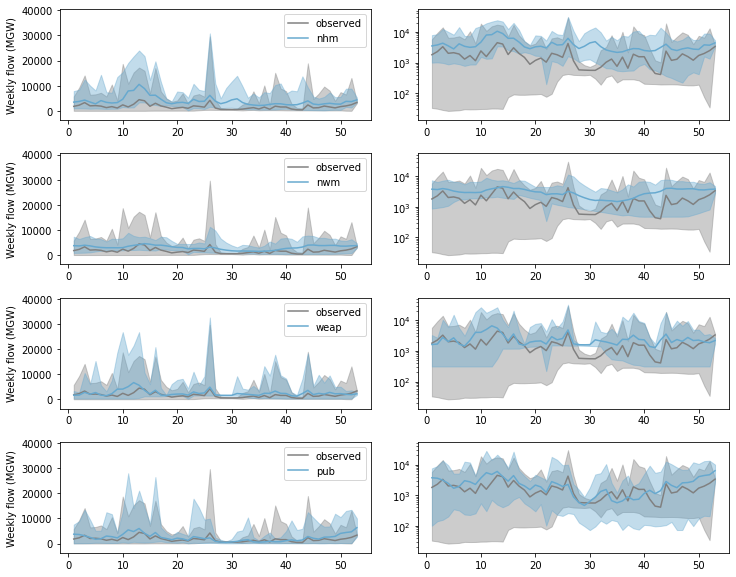

In [38]:
### seasonal (weekly) distributions for: NHM, NWM, WEAP, PUB
uselog = False

fig = plt.figure(figsize=(12, 10))
gs = fig.add_gridspec(4,2, wspace=0.15, hspace=0.3)
obs = results_dict['obs'][reservoir]

obs_resample = obs.resample('W').sum()
ymax = obs_resample.groupby(obs_resample.index.week).max().max()
ymin = obs_resample.groupby(obs_resample.index.week).min().min()
for i, d in enumerate(('nhm','nhm_pywr','nwm','nwm_pywr','weap', 'weap_nhm_pywr','pub','pub_pywr')): 
    try:
        modeled = results_dict[d][f'outflow_{reservoir}']
    except:
        try:
            modeled = results_dict[d][f'link_{reservoir}']
        except:
            try:
                modeled = results_dict[d][reservoir]
            except:
                modeled = results_dict['obs'][reservoir] * 0
    modeled_resample = modeled.resample('W').sum()
    ymax = max(ymax, modeled_resample.groupby(modeled_resample.index.week).max().max())
    ymin = min(ymin, modeled_resample.groupby(modeled_resample.index.week).min().min())
    
for i, d in enumerate(('nhm','nhm_pywr','nwm','nwm_pywr','weap', 'weap_nhm_pywr','pub','pub_pywr')): 
    if usepywr or i % 2 == 0:
        ### first plot time series of observed vs modeled
        row = int(i/2)
        color = colors[i % 2 +1]
        if i % 2 == 0:
            ax = fig.add_subplot(gs[row,0])
        try:
            modeled = results_dict[d][f'outflow_{reservoir}']
        except:
            try:
                modeled = results_dict[d][f'link_{reservoir}']
            except:
                try:
                    modeled = results_dict[d][reservoir]
                except:
                    modeled = results_dict['obs'][reservoir] * 0

        if i % 2 == 0:
            ax.fill_between(np.arange(1,54), obs_resample.groupby(obs_resample.index.week).max(), obs_resample.groupby(obs_resample.index.week).min(), color=colors[0], alpha=0.4)
            ax.plot(obs_resample.groupby(obs_resample.index.week).mean(), label='observed', color=colors[0])
        
        modeled_resample = modeled.resample('W').sum()
        ax.fill_between(np.arange(1,54), modeled_resample.groupby(modeled_resample.index.week).max(), modeled_resample.groupby(modeled_resample.index.week).min(), color=color, alpha=0.4)
        ax.plot(modeled_resample.groupby(modeled_resample.index.week).mean(), label=d, color=color)

        ax.legend(loc='upper right')
        ax.set_ylabel('Weekly flow (MGW)')
        ax.set_ylim([-0.1*ymax, ymax*1.1])
        if uselog:
            ax.semilogy()
                
uselog = True
for i, d in enumerate(('nhm','nhm_pywr','nwm','nwm_pywr','weap', 'weap_nhm_pywr','pub','pub_pywr')): 
    if usepywr or i % 2 == 0:
        ### first plot time series of observed vs modeled
        row = int(i/2)
        color = colors[i % 2 +1]
        if i % 2 == 0:
            ax = fig.add_subplot(gs[row,1])
        try:
            modeled = results_dict[d][f'outflow_{reservoir}']
        except:
            try:
                modeled = results_dict[d][f'link_{reservoir}']
            except:
                try:
                    modeled = results_dict[d][reservoir]
                except:
                    modeled = results_dict['obs'][reservoir] * 0
        if i % 2 == 0:
            ax.fill_between(np.arange(1,54), obs_resample.groupby(obs_resample.index.week).max(), obs_resample.groupby(obs_resample.index.week).min(), color=colors[0], alpha=0.4)
            ax.plot(obs_resample.groupby(obs_resample.index.week).mean(), label='observed', color=colors[0])
        
        modeled_resample = modeled.resample('W').sum()
        ax.fill_between(np.arange(1,54), modeled_resample.groupby(modeled_resample.index.week).max(), modeled_resample.groupby(modeled_resample.index.week).min(), color=color, alpha=0.4)
        ax.plot(modeled_resample.groupby(modeled_resample.index.week).mean(), label=d, color=color)
        
        ax.set_ylim([max(ymin*0.5, 0.01), ymax*1.5])

        if uselog:
            ax.semilogy()
        


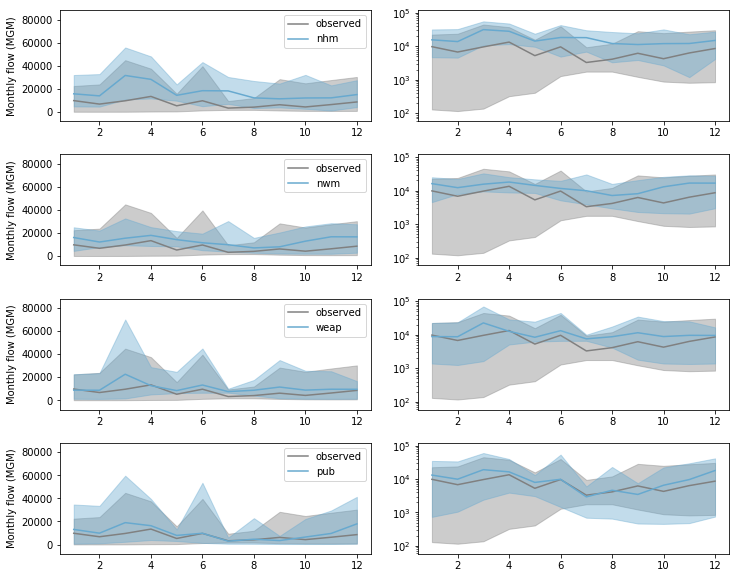

In [39]:
### seasonal (monthly) distributions for: NHM, NWM, WEAP, PUB
uselog = False

fig = plt.figure(figsize=(12, 10))
gs = fig.add_gridspec(4,2, wspace=0.15, hspace=0.3)
obs = results_dict['obs'][reservoir]
obs_resample = obs.resample('M').sum()

ymax = obs_resample.groupby(obs_resample.index.month).max().max()
ymin = obs_resample.groupby(obs_resample.index.month).min().min()
for i, d in enumerate(('nhm','nhm_pywr','nwm','nwm_pywr','weap', 'weap_nhm_pywr','pub','pub_pywr')): 
    try:
        modeled = results_dict[d][f'outflow_{reservoir}']
    except:
        try:
            modeled = results_dict[d][f'link_{reservoir}']
        except:
            try:
                modeled = results_dict[d][reservoir]
            except:
                modeled = results_dict['obs'][reservoir] * 0
    modeled_resample = modeled.resample('M').sum()
    ymax = max(ymax, modeled_resample.groupby(modeled_resample.index.month).max().max())
    ymin = min(ymin, modeled_resample.groupby(modeled_resample.index.month).min().min())
    
for i, d in enumerate(('nhm','nhm_pywr','nwm','nwm_pywr','weap', 'weap_nhm_pywr','pub','pub_pywr')): 
    if usepywr or i % 2 == 0:
        ### first plot time series of observed vs modeled
        row = int(i/2)
        color = colors[i % 2 +1]
        if i % 2 == 0:
            ax = fig.add_subplot(gs[row,0])
        try:
            modeled = results_dict[d][f'outflow_{reservoir}']
        except:
            try:
                modeled = results_dict[d][f'link_{reservoir}']
            except:
                try:
                    modeled = results_dict[d][reservoir]
                except:
                    modeled = results_dict['obs'][reservoir] * 0

        if i % 2 == 0:
            ax.fill_between(np.arange(1,13), obs_resample.groupby(obs_resample.index.month).max(), obs_resample.groupby(obs_resample.index.month).min(), color=colors[0], alpha=0.4)
            ax.plot(obs_resample.groupby(obs_resample.index.month).mean(), label='observed', color=colors[0])
        
        modeled_resample = modeled.resample('M').sum()
        ax.fill_between(np.arange(1,13), modeled_resample.groupby(modeled_resample.index.month).max(), modeled_resample.groupby(modeled_resample.index.month).min(), color=color, alpha=0.4)
        ax.plot(modeled_resample.groupby(modeled_resample.index.month).mean(), label=d, color=color)

        ax.legend(loc='upper right')
        ax.set_ylabel('Monthly flow (MGM)')
        ax.set_ylim([-0.1*ymax, ymax*1.1])
        if uselog:
            ax.semilogy()
                
uselog = True
for i, d in enumerate(('nhm','nhm_pywr','nwm','nwm_pywr','weap', 'weap_nhm_pywr','pub','pub_pywr')): 
    if usepywr or i % 2 == 0:
        ### first plot time series of observed vs modeled
        row = int(i/2)
        color = colors[i % 2 +1]
        if i % 2 == 0:
            ax = fig.add_subplot(gs[row,1])
        try:
            modeled = results_dict[d][f'outflow_{reservoir}']
        except:
            try:
                modeled = results_dict[d][f'link_{reservoir}']
            except:
                try:
                    modeled = results_dict[d][reservoir]
                except:
                    modeled = results_dict['obs'][reservoir] * 0
        if i % 2 == 0:
            ax.fill_between(np.arange(1,13), obs_resample.groupby(obs_resample.index.month).max(), obs_resample.groupby(obs_resample.index.month).min(), color=colors[0], alpha=0.4)
            ax.plot(obs_resample.groupby(obs_resample.index.month).mean(), label='observed', color=colors[0])
        
        modeled_resample = modeled.resample('M').sum()
        ax.fill_between(np.arange(1,13), modeled_resample.groupby(modeled_resample.index.month).max(), modeled_resample.groupby(modeled_resample.index.month).min(), color=color, alpha=0.4)
        ax.plot(modeled_resample.groupby(modeled_resample.index.month).mean(), label=d, color=color)
        
        ax.set_ylim([max(ymin*0.5, 0.01), ymax*1.5])

        if uselog:
            ax.semilogy()
        


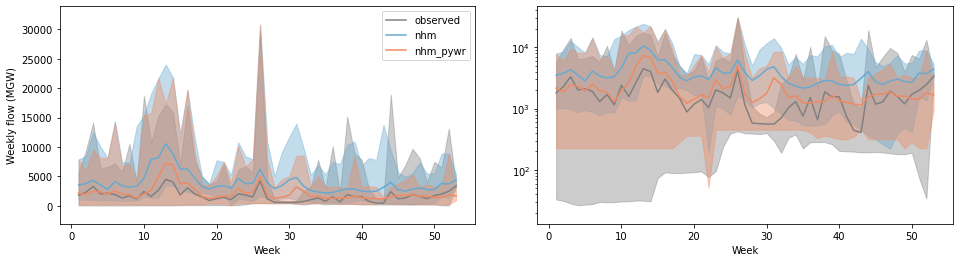

In [40]:
### seasonal (weekly) distributions for: NHM, NWM
uselog = False
use2nd = True
fig = plt.figure(figsize=(16, 4))
gs = fig.add_gridspec(1,2, wspace=0.15, hspace=0.3)
obs = results_dict['obs'][reservoir]

obs_resample = obs.resample('W').sum()
ymax = obs_resample.groupby(obs_resample.index.week).max().max()
ymin = obs_resample.groupby(obs_resample.index.week).min().min()
models = ['nhm', 'nhm_pywr']
for i, d in enumerate(models): 
    try:
        modeled = results_dict[d][f'outflow_{reservoir}']
    except:
        try:
            modeled = results_dict[d][f'link_{reservoir}']
        except:
            try:
                modeled = results_dict[d][reservoir]
            except:
                modeled = results_dict['obs'][reservoir] * 0
    modeled_resample = modeled.resample('W').sum()
    ymax = max(ymax, modeled_resample.groupby(modeled_resample.index.week).max().max())
    ymin = min(ymin, modeled_resample.groupby(modeled_resample.index.week).min().min())
    
for i, d in enumerate(models): 
    if use2nd or i % 2 == 0:
        ### first plot time series of observed vs modeled
        row = int(i/2)
        color = colors[i % 2 +1]
        if i % 2 == 0:
            ax = fig.add_subplot(gs[row,0])
        try:
            modeled = results_dict[d][f'outflow_{reservoir}']
        except:
            try:
                modeled = results_dict[d][f'link_{reservoir}']
            except:
                try:
                    modeled = results_dict[d][reservoir]
                except:
                    modeled = results_dict['obs'][reservoir] * 0

        if i % 2 == 0:
            ax.fill_between(np.arange(1,54), obs_resample.groupby(obs_resample.index.week).max(), obs_resample.groupby(obs_resample.index.week).min(), color=colors[0], alpha=0.4)
            ax.plot(obs_resample.groupby(obs_resample.index.week).mean(), label='observed', color=colors[0])
        
        modeled_resample = modeled.resample('W').sum()
        ax.fill_between(np.arange(1,54), modeled_resample.groupby(modeled_resample.index.week).max(), modeled_resample.groupby(modeled_resample.index.week).min(), color=color, alpha=0.4)
        ax.plot(modeled_resample.groupby(modeled_resample.index.week).mean(), label=d, color=color)

        ax.legend(loc='upper right')
        ax.set_ylabel('Weekly flow (MGW)')
        ax.set_xlabel('Week')
        ax.set_ylim([-0.1*ymax, ymax*1.1])
        if uselog:
            ax.semilogy()
                
uselog = True
for i, d in enumerate(models): 
    if use2nd or i % 2 == 0:
        ### first plot time series of observed vs modeled
        row = int(i/2)
        color = colors[i % 2 +1]
        if i % 2 == 0:
            ax = fig.add_subplot(gs[row,1])
        try:
            modeled = results_dict[d][f'outflow_{reservoir}']
        except:
            try:
                modeled = results_dict[d][f'link_{reservoir}']
            except:
                try:
                    modeled = results_dict[d][reservoir]
                except:
                    modeled = results_dict['obs'][reservoir] * 0
        if i % 2 == 0:
            ax.fill_between(np.arange(1,54), obs_resample.groupby(obs_resample.index.week).max(), obs_resample.groupby(obs_resample.index.week).min(), color=colors[0], alpha=0.4)
            ax.plot(obs_resample.groupby(obs_resample.index.week).mean(), label='observed', color=colors[0])
        
        modeled_resample = modeled.resample('W').sum()
        ax.fill_between(np.arange(1,54), modeled_resample.groupby(modeled_resample.index.week).max(), modeled_resample.groupby(modeled_resample.index.week).min(), color=color, alpha=0.4)
        ax.plot(modeled_resample.groupby(modeled_resample.index.week).mean(), label=d, color=color)
        
        ax.set_ylim([max(ymin*0.5, 0.01), ymax*1.5])
        ax.set_xlabel('Week')

        if uselog:
            ax.semilogy()
        
if use2nd:
    plt.savefig(figdir + f'streamflow_monthly_{models[1]}.png', bbox_inches='tight')
else:
    plt.savefig(figdir + 'streamflow_monthly_Nhm.png', bbox_inches='tight')   

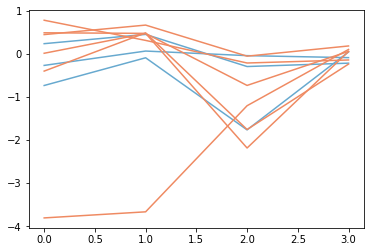

In [41]:
### error boxplots across models, metrics, & reservoirs
uselog = False
# usepywr = True
colors = ['0.5', '#67a9cf', '#ef8a62']
# reservoirs = ['cannonsville','pepacton','neversink','wallenpaupack', 'prompton', 'shoholaMarsh', 'mongaupeCombined','beltzvilleCombined','fewalter','merrillCreek','hopatcong','nockamixon','assunpink','ontelaunee','stillCreek','blueMarsh','greenLane','marshCreek']
reservoirs = ['cannonsville','pepacton','neversink','prompton','beltzvilleCombined','fewalter','nockamixon','blueMarsh','marshCreek']


# fig = plt.figure(figsize=(16, 10))
# gs = fig.add_gridspec(4,3,  width_ratios=(5,1,1), wspace=0.25, hspace=0.3)
# axs[0].set_title(reservoir)
nses, kges, rs, alphas, betas = {},{},{},{},{}
rescols = []
for j,reservoir in enumerate(reservoirs):
    nses[reservoir], kges[reservoir], rs[reservoir], alphas[reservoir], betas[reservoir] = [],[],[],[],[]
    obs = results_dict['obs'][reservoir]
    if j < 3:
        rescols.append(colors[1])
    else:
        rescols.append(colors[2])
    for i, d in enumerate(('nhm','nhm_pywr','nwm','nwm_pywr','weap', 'weap_nhm_pywr','pub','pub_pywr')): 
        if usepywr or i % 2 == 0:
            ### first plot time series of observed vs modeled
            try:
                modeled = results_dict[d][f'outflow_{reservoir}']
            except:
                try:
                    modeled = results_dict[d][f'link_{reservoir}']
                except:
                    try:
                        modeled = results_dict[d][reservoir]
                    except:
                        modeled = results_dict['obs'][reservoir] * 0

            if uselog:
                kge, r, alpha, beta = he.evaluator(he.kge, np.log(modeled+0.01), np.log(obs+0.01))
                nse = he.evaluator(he.nse, np.log(modeled+0.01), np.log(obs+0.01))
            else:
                kge, r, alpha, beta = he.evaluator(he.kge, modeled, obs)
                nse = he.evaluator(he.nse, modeled, obs)

            nses[reservoir].append(nse[0])
            kges[reservoir].append(kge[0])
            rs[reservoir].append(r[0])
            alphas[reservoir].append(alpha[0])
            betas[reservoir].append(beta[0])
        
### boxplots
for j, reservoir in enumerate(reservoirs): 
    plt.plot(nses[reservoir], color=rescols[j])




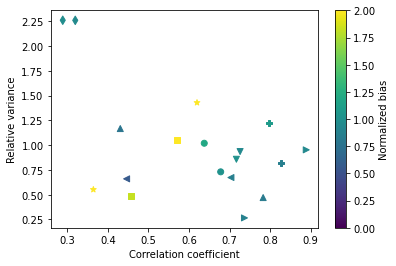

In [42]:
### plot kge metrics: r vs alpha vs bias
uselog = False
# usepywr = True

# reservoirs = ['cannonsville','pepacton','neversink','wallenpaupack', 'prompton', 'shoholaMarsh', 'mongaupeCombined','beltzvilleCombined','fewalter','merrillCreek','hopatcong','nockamixon','assunpink','ontelaunee','stillCreek','blueMarsh','greenLane','marshCreek']
reservoirs = ['cannonsville','pepacton','neversink','prompton','beltzvilleCombined','fewalter','nockamixon','blueMarsh','marshCreek']

# models = ['nhm','nhm_pywr','nwm','nwm_pywr','weap', 'weap_nhm_pywr','pub','pub_pywr']
models = ['nhm','nwm']

nses, kges, rs, alphas, betas = {},{},{},{},{}
rescols = []
for j,reservoir in enumerate(reservoirs):
    nses[reservoir], kges[reservoir], rs[reservoir], alphas[reservoir], betas[reservoir] = [],[],[],[],[]
    obs = results_dict['obs'][reservoir]
    if j < 3:
        rescols.append(colors[1])
    else:
        rescols.append(colors[2])
    for i, d in enumerate(models): 
        ### first plot time series of observed vs modeled
        try:
            modeled = results_dict[d][f'outflow_{reservoir}']
        except:
            try:
                modeled = results_dict[d][f'link_{reservoir}']
            except:
                try:
                    modeled = results_dict[d][reservoir]
                except:
                    modeled = results_dict['obs'][reservoir] * 0

        if uselog:
            kge, r, alpha, beta = he.evaluator(he.kge, np.log(modeled+0.01), np.log(obs+0.01))
            nse = he.evaluator(he.nse, np.log(modeled+0.01), np.log(obs+0.01))
        else:
            kge, r, alpha, beta = he.evaluator(he.kge, modeled, obs)
            nse = he.evaluator(he.nse, modeled, obs)

        nses[reservoir].append(nse[0])
        kges[reservoir].append(kge[0])
        rs[reservoir].append(r[0])
        alphas[reservoir].append(alpha[0])
        betas[reservoir].append(beta[0])

### plot error metrics
# colordict = {'nhm':'#66c2a5', 'nwm':'#8da0cb', 'weap':'#fc8d62'}

markerdict = {'cannonsville':'o', 'pepacton':'s','neversink':'*','prompton':'P','beltzvilleCombined':'^','fewalter':'<',
              'nockamixon':'>','blueMarsh':'v','marshCreek':'d'}
cmapdict = {''}
fig, ax = plt.subplots(1,1)
for j, reservoir in enumerate(reservoirs): 
    sc = ax.scatter(rs[reservoir], alphas[reservoir], c=betas[reservoir], marker=markerdict[reservoir], label=reservoir,
                    cmap='viridis', vmin=0, vmax=2)
#     sc = ax.scatter(rs[reservoir], alphas[reservoir], marker=markerdict[reservoir], label=reservoir,
#                     color='none', edgecolor='k')
    if j == 0:
        plt.colorbar(sc, ax=ax, label='Normalized bias')
        ax.set_xlabel('Correlation coefficient')
        ax.set_ylabel('Relative variance')
#     plt.legend()



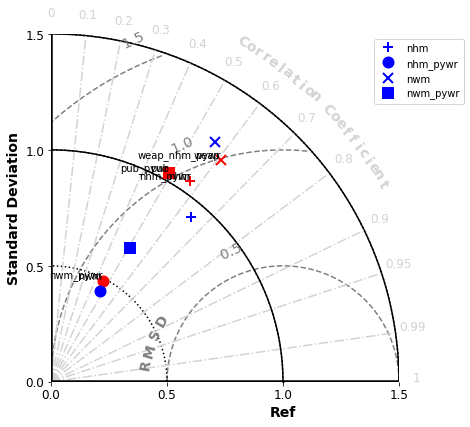

In [43]:
### Taylor diagram, separated by model
### Adapted from SkillMetrics example Taylor diagrams: https://github.com/PeterRochford/SkillMetrics/wiki/

from matplotlib import rcParams
import skill_metrics as sm
        

reservoir = 'pepacton'

# Set the figure properties (optional)
rcParams["figure.figsize"] = [8.0, 6.4] #works
rcParams.update({'font.size': 12}) # font size of axes text

obs = results_dict['obs'][reservoir]
taylor_stats = []
models = ['nhm','nhm_pywr','nwm','nwm_pywr','weap', 'weap_nhm_pywr','pub','pub_pywr']
for i, d in enumerate(models): 
    if usepywr or i % 2 == 0:
        ### first plot time series of observed vs modeled
        try:
            modeled = results_dict[d][f'outflow_{reservoir}']
        except:
            try:
                modeled = results_dict[d][f'link_{reservoir}']
            except:
                try:
                    modeled = results_dict[d][reservoir]
                except:
                    modeled = results_dict['obs'][reservoir] * 0

    # Calculate statistics for target diagram
    taylor_stats.append(sm.taylor_statistics(modeled, obs))

# Store statistics in arrays
sdev = [taylor_stats[0]['sdev'][0]]
crmsd = [taylor_stats[0]['crmsd'][0]]
ccoef = [taylor_stats[0]['ccoef'][0]]
for i in range(len(taylor_stats)):
    sdev.append(taylor_stats[i]['sdev'][1])
    crmsd.append(taylor_stats[i]['crmsd'][1])
    ccoef.append(taylor_stats[i]['ccoef'][1])

sdev = np.array(sdev)
sdev /= sdev[0]  ### use relative standard deviation
crmsd = np.array(crmsd)
ccoef = np.array(ccoef)
'''
Produce the Taylor diagram
Note that the first index corresponds to the reference series for 
the diagram. For example sdev[0] is the standard deviation of the 
reference series and sdev[1:4] are the standard deviations of the 
other 3 series. The value of sdev[0] is used to define the origin 
of the RMSD contours. The other values are used to plot the points 
(total of 3) that appear in the diagram.
For an exhaustive list of options to customize your diagram, 
please call the function at a Python command line:
>> taylor_diagram
'''
# sm.taylor_diagram()

label = ['obs'] + models
markercolors = [colors[1], colors[2]] * 4
sm.taylor_diagram(sdev,crmsd,ccoef, markerLabel = label, 
                      markerLegend = 'off', markerColor = 'w',
                      styleOBS = '-', colOBS = 'k', markerobs = 'o', colCOR = 'lightgrey',
                      markerSize = 6, #tickRMS = [0.0, 1.0, 2.0, 3.0],
                      tickRMSangle = 115, showlabelsRMS = 'on', colRMS = 'grey',
                      titleRMS = 'on', titleOBS = 'Ref')


### loop back over to distinguish colors - first do non-pywr
taylor_stats = []
for i, d in enumerate(models): 
    if i % 2 == 0:
        ### first plot time series of observed vs modeled
        try:
            modeled = results_dict[d][f'outflow_{reservoir}']
        except:
            try:
                modeled = results_dict[d][f'link_{reservoir}']
            except:
                try:
                    modeled = results_dict[d][reservoir]
                except:
                    modeled = results_dict['obs'][reservoir] * 0

        # Calculate statistics for target diagram
        taylor_stats.append(sm.taylor_statistics(modeled, obs))

# Store statistics in arrays
sdev = [taylor_stats[0]['sdev'][0]]
crmsd = [taylor_stats[0]['crmsd'][0]]
ccoef = [taylor_stats[0]['ccoef'][0]]
for i in range(len(taylor_stats)):
    sdev.append(taylor_stats[i]['sdev'][1])
    crmsd.append(taylor_stats[i]['crmsd'][1])
    ccoef.append(taylor_stats[i]['ccoef'][1])

sdev = np.array(sdev)
sdev /= sdev[0]  ### use relative standard deviation
crmsd = np.array(crmsd)
ccoef = np.array(ccoef)

sm.taylor_diagram(sdev,crmsd,ccoef, markerLabel = label, 
                      markerLegend = 'on', markerColor = 'r',
                     overlay = True)

### loop back over to distinguish colors - now do pywr
taylor_stats = []
for i, d in enumerate(models): 
    if i % 2 == 1:
        ### first plot time series of observed vs modeled
        try:
            modeled = results_dict[d][f'outflow_{reservoir}']
        except:
            try:
                modeled = results_dict[d][f'link_{reservoir}']
            except:
                try:
                    modeled = results_dict[d][reservoir]
                except:
                    modeled = results_dict['obs'][reservoir] * 0

        # Calculate statistics for target diagram
        taylor_stats.append(sm.taylor_statistics(modeled, obs))

# Store statistics in arrays
sdev = [taylor_stats[0]['sdev'][0]]
crmsd = [taylor_stats[0]['crmsd'][0]]
ccoef = [taylor_stats[0]['ccoef'][0]]
for i in range(len(taylor_stats)):
    sdev.append(taylor_stats[i]['sdev'][1])
    crmsd.append(taylor_stats[i]['crmsd'][1])
    ccoef.append(taylor_stats[i]['ccoef'][1])

sdev = np.array(sdev)
sdev /= sdev[0]  ### use relative standard deviation
crmsd = np.array(crmsd)
ccoef = np.array(ccoef)

sm.taylor_diagram(sdev,crmsd,ccoef, markerLabel = label, 
                      markerLegend = 'on', markerColor = 'b',
                     overlay = True)

[1.         1.0191123  0.7305769  1.17583085 1.         1.05221909
 0.48733524 1.20340808 1.         1.42914535 0.55186283 1.74715027
 1.         1.2222917  0.82134569 1.05118513 1.         1.16730143
 0.4707656  1.75994035 1.         0.65983246 0.67303072 0.
 1.         0.95245613 0.26543515 0.         1.         0.85745738
 0.93543285 1.69884777 1.         2.26068824 2.25958741 0.        ]


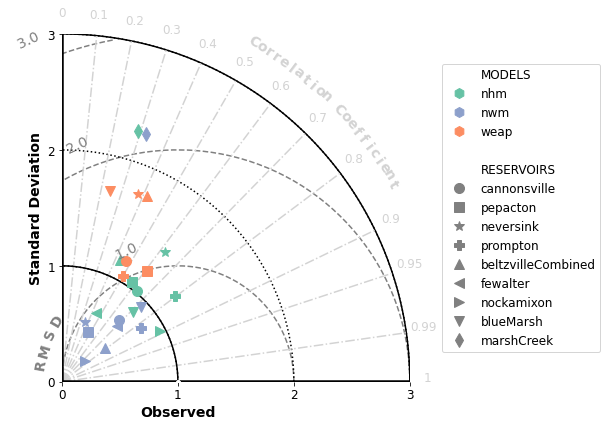

In [44]:
### Taylor diagram, highlighting non-pywr
### Adapted from SkillMetrics example Taylor diagrams: https://github.com/PeterRochford/SkillMetrics/wiki/

from matplotlib import rcParams
import skill_metrics as sm
            
# Set the figure properties (optional)
rcParams["figure.figsize"] = [8.0, 6.4] #works
rcParams.update({'font.size': 12}) # font size of axes text

taylor_stats = []
models = ['nhm','nwm','weap']
# reservoirs = ['cannonsville','pepacton','neversink','prompton','beltzvilleCombined','blueMarsh']
reservoirs = ['cannonsville','pepacton','neversink','prompton','beltzvilleCombined','fewalter','nockamixon','blueMarsh','marshCreek']
# reservoirs = ['cannonsville']
sdev, crmsd, ccoef = [],[],[]
for j, reservoir in enumerate(reservoirs): 
    taylor_stats = []
    for i, d in enumerate(models):
        obs = results_dict['obs'][reservoir]
        ### first plot time series of observed vs modeled
        try:
            modeled = results_dict[d][f'outflow_{reservoir}']
        except:
            try:
                modeled = results_dict[d][f'link_{reservoir}']
            except:
                try:
                    modeled = results_dict[d][reservoir]
                except:
                    modeled = results_dict['obs'][reservoir] * 0

        # Calculate statistics for target diagram
        taylor_stats.append(sm.taylor_statistics(modeled, obs))

    # Store statistics in arrays
    sdev0 = [taylor_stats[0]['sdev'][0]]
    crmsd0 = [taylor_stats[0]['crmsd'][0]]
    ccoef0 = [taylor_stats[0]['ccoef'][0]]
    for i in range(len(taylor_stats)):
        sdev0.append(taylor_stats[i]['sdev'][1])
        crmsd0.append(taylor_stats[i]['crmsd'][1])
        ccoef0.append(taylor_stats[i]['ccoef'][1])

    sdev += [s / sdev0[0] for s in sdev0]  ### use relative standard deviation
    crmsd += crmsd0
    ccoef += ccoef0
    
sdev = np.array(sdev)
print(sdev)
crmsd = np.array(crmsd)
ccoef = np.array(ccoef)

label = ['obs'] + reservoirs * len(models)
markercolors = [colors[1], colors[2]] * 4
sm.taylor_diagram(sdev,crmsd,ccoef, 
                      markerLegend = 'off', markerColor = 'w',
                      styleOBS = '-', colOBS = 'k', markerobs = 'o', colCOR = 'lightgrey',
                      markerSize = 6, #tickRMS = [0.0, 1.0, 2.0, 3.0],
                      tickRMSangle = 115, showlabelsRMS = 'on', colRMS = 'grey',
                      titleRMS = 'on', titleOBS = 'Observed')


### loop back over to distinguish colors & markers
colordict = {'nhm':'#66c2a5', 'nwm':'#8da0cb', 'weap':'#fc8d62','nhm_pywr':'#66c2a5', 'nwm_pywr':'#8da0cb', 'weap_nhm_pywr':'#fc8d62'}
markerdict = {'cannonsville':'o', 'pepacton':'s','neversink':'*','prompton':'P','beltzvilleCombined':'^','fewalter':'<',
              'nockamixon':'>','blueMarsh':'v','marshCreek':'d'}

for i, d in enumerate(models):
    for j, reservoir in enumerate(reservoirs): 
        taylor_stats = []
        obs = results_dict['obs'][reservoir]
        ### first plot time series of observed vs modeled
        try:
            modeled = results_dict[d][f'outflow_{reservoir}']
        except:
            try:
                modeled = results_dict[d][f'link_{reservoir}']
            except:
                try:
                    modeled = results_dict[d][reservoir]
                except:
                    modeled = results_dict['obs'][reservoir] * 0

        # Calculate statistics for target diagram
        taylor_stats.append(sm.taylor_statistics(modeled, obs))

        # Store statistics in arrays
        sdev = [taylor_stats[0]['sdev'][0]]
        crmsd = [taylor_stats[0]['crmsd'][0]]
        ccoef = [taylor_stats[0]['ccoef'][0]]
        for k in range(len(taylor_stats)):
            sdev.append(taylor_stats[k]['sdev'][1])
            crmsd.append(taylor_stats[k]['crmsd'][1])
            ccoef.append(taylor_stats[k]['ccoef'][1])

        sdev = np.array(sdev)
        sdev /= sdev[0]  ### use relative standard deviation
        crmsd = np.array(crmsd)
        ccoef = np.array(ccoef)
        label = ['obs'] + reservoirs 
        
        sm.taylor_diagram(sdev,crmsd,ccoef, 
                              markerLegend = 'off', 
                          markerColor = colordict[d],
                          markerSymbol = markerdict[reservoir],
                          alpha = 1,
                             overlay = True)
        
legend_elements = []
legend_elements.append(Line2D([0],[0],color='none',label='MODELS'))
for d in models:
    legend_elements.append(Line2D([0],[0],color='w',markerfacecolor=colordict[d],markeredgecolor=colordict[d],
                                  marker='h',label=d, ms=10))
legend_elements.append(Line2D([0],[0],color='none',label=''))
legend_elements.append(Line2D([0],[0],color='none',label='RESERVOIRS'))
for reservoir in reservoirs:
    legend_elements.append(Line2D([0],[0],color='w',markerfacecolor='grey',markeredgecolor='grey',
                                  marker=markerdict[reservoir],label=reservoir, ms=10))

plt.legend(handles=legend_elements, loc='center', bbox_to_anchor=(1.32,0.5))

plt.savefig(figdir + 'taylor_allRes_allMod_withoutPywr.png', bbox_inches='tight')

[1.         1.0191123  0.7305769  1.         1.05221909 0.48733524
 1.         1.42914535 0.55186283 1.         1.2222917  0.82134569
 1.         1.16730143 0.4707656  1.         0.65983246 0.67303072
 1.         0.95245613 0.26543515 1.         0.85745738 0.93543285
 1.         2.26068824 2.25958741]


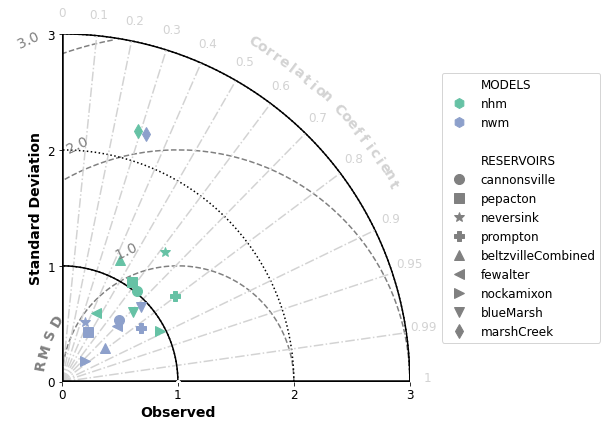

In [45]:
### Taylor diagram, highlighting nhm vs nwm, pepacton only
### Adapted from SkillMetrics example Taylor diagrams: https://github.com/PeterRochford/SkillMetrics/wiki/

from matplotlib import rcParams
import skill_metrics as sm
        
# Set the figure properties (optional)
rcParams["figure.figsize"] = [8.0, 6.4] #works
rcParams.update({'font.size': 12}) # font size of axes text

taylor_stats = []
models = ['nhm','nwm']#,'weap']
# reservoirs = ['cannonsville','pepacton','neversink','prompton','beltzvilleCombined','blueMarsh']
reservoirs = ['cannonsville','pepacton','neversink','prompton','beltzvilleCombined','fewalter','nockamixon','blueMarsh','marshCreek']
# reservoirs = ['pepacton', 'cannonsville', 'neversink']
sdev, crmsd, ccoef = [],[],[]
for j, reservoir in enumerate(reservoirs): 
    taylor_stats = []
    for i, d in enumerate(models):
        obs = results_dict['obs'][reservoir]
        ### first plot time series of observed vs modeled
        try:
            modeled = results_dict[d][f'outflow_{reservoir}']
        except:
            try:
                modeled = results_dict[d][f'link_{reservoir}']
            except:
                try:
                    modeled = results_dict[d][reservoir]
                except:
                    modeled = results_dict['obs'][reservoir] * 0

        # Calculate statistics for target diagram
        taylor_stats.append(sm.taylor_statistics(modeled, obs))

    # Store statistics in arrays
    sdev0 = [taylor_stats[0]['sdev'][0]]
    crmsd0 = [taylor_stats[0]['crmsd'][0]]
    ccoef0 = [taylor_stats[0]['ccoef'][0]]
    for i in range(len(taylor_stats)):
        sdev0.append(taylor_stats[i]['sdev'][1])
        crmsd0.append(taylor_stats[i]['crmsd'][1])
        ccoef0.append(taylor_stats[i]['ccoef'][1])

    sdev += [s / sdev0[0] for s in sdev0]  ### use relative standard deviation
    crmsd += crmsd0
    ccoef += ccoef0
    
sdev = np.array(sdev)
print(sdev)
crmsd = np.array(crmsd)
ccoef = np.array(ccoef)

label = ['obs'] + reservoirs * len(models)
markercolors = [colors[1], colors[2]] * 4
sm.taylor_diagram(sdev,crmsd,ccoef, 
                      markerLegend = 'off', markerColor = 'w',
                      styleOBS = '-', colOBS = 'k', markerobs = 'o', colCOR = 'lightgrey',
                      markerSize = 6, #tickRMS = [0.0, 1.0, 2.0, 3.0],
                      tickRMSangle = 115, showlabelsRMS = 'on', colRMS = 'grey',
                      titleRMS = 'on', titleOBS = 'Observed')


### loop back over to distinguish colors & markers
colordict = {'nhm':'#66c2a5', 'nwm':'#8da0cb', 'weap':'#fc8d62','nhm_pywr':'#66c2a5', 'nwm_pywr':'#8da0cb', 'weap_nhm_pywr':'#fc8d62'}
markerdict = {'cannonsville':'o', 'pepacton':'s','neversink':'*','prompton':'P','beltzvilleCombined':'^','fewalter':'<',
              'nockamixon':'>','blueMarsh':'v','marshCreek':'d'}

for i, d in enumerate(models):
    for j, reservoir in enumerate(reservoirs): 
        taylor_stats = []
        obs = results_dict['obs'][reservoir]
        ### first plot time series of observed vs modeled
        try:
            modeled = results_dict[d][f'outflow_{reservoir}']
        except:
            try:
                modeled = results_dict[d][f'link_{reservoir}']
            except:
                try:
                    modeled = results_dict[d][reservoir]
                except:
                    modeled = results_dict['obs'][reservoir] * 0

        # Calculate statistics for target diagram
        taylor_stats.append(sm.taylor_statistics(modeled, obs))

        # Store statistics in arrays
        sdev = [taylor_stats[0]['sdev'][0]]
        crmsd = [taylor_stats[0]['crmsd'][0]]
        ccoef = [taylor_stats[0]['ccoef'][0]]
        for k in range(len(taylor_stats)):
            sdev.append(taylor_stats[k]['sdev'][1])
            crmsd.append(taylor_stats[k]['crmsd'][1])
            ccoef.append(taylor_stats[k]['ccoef'][1])

        sdev = np.array(sdev)
        sdev /= sdev[0]  ### use relative standard deviation
        crmsd = np.array(crmsd)
        ccoef = np.array(ccoef)
        label = ['obs'] + reservoirs 
        
        sm.taylor_diagram(sdev,crmsd,ccoef, 
                              markerLegend = 'off', 
                          markerColor = colordict[d],
                          markerSymbol = markerdict[reservoir],
                          alpha = 1,
                             overlay = True)
        
legend_elements = []
legend_elements.append(Line2D([0],[0],color='none',label='MODELS'))
for d in models:
    legend_elements.append(Line2D([0],[0],color='w',markerfacecolor=colordict[d],markeredgecolor=colordict[d],
                                  marker='h',label=d, ms=10))
legend_elements.append(Line2D([0],[0],color='none',label=''))
legend_elements.append(Line2D([0],[0],color='none',label='RESERVOIRS'))
for reservoir in reservoirs:
    legend_elements.append(Line2D([0],[0],color='w',markerfacecolor='grey',markeredgecolor='grey',
                                  marker=markerdict[reservoir],label=reservoir, ms=10))

plt.legend(handles=legend_elements, loc='center', bbox_to_anchor=(1.32,0.5))

plt.savefig(figdir + 'taylor_allRes_NhmNwm.png', bbox_inches='tight')

[1.         1.0191123  0.7305769  1.17583085 0.8914291  0.63440734
 1.07502808 1.         1.05221909 0.48733524 1.20340808 0.93254355
 0.44461392 1.25414235 1.         1.42914535 0.55186283 1.74715027
 1.12992971 0.42542764 1.37773799 1.         1.2222917  0.82134569
 1.05118513 1.22034949 0.82309636 1.22034949 1.         1.16730143
 0.4707656  1.75994035 1.02783058 0.57330647 1.84800365 1.
 0.65983246 0.67303072 0.         0.65913438 0.67340739 0.65913438
 1.         0.95245613 0.26543515 0.         0.90042393 0.34208721
 0.69565153 1.         0.85745738 0.93543285 1.69884777 0.97087344
 1.0161686  1.70002529 1.         2.26068824 2.25958741 0.
 2.24048462 2.24516405 2.24048462]


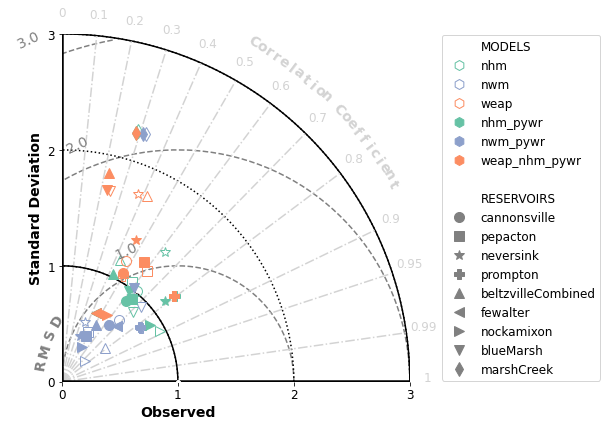

In [46]:
### Taylor diagram, highlighting pywr vs non-pywr models
### Adapted from SkillMetrics example Taylor diagrams: https://github.com/PeterRochford/SkillMetrics/wiki/

from matplotlib import rcParams
import skill_metrics as sm
        
# Set the figure properties (optional)
rcParams["figure.figsize"] = [8.0, 6.4] #works
rcParams.update({'font.size': 12}) # font size of axes text

taylor_stats = []
models = ['nhm','nwm','weap','nhm_pywr','nwm_pywr','weap_nhm_pywr']
# reservoirs = ['cannonsville','pepacton','neversink','prompton','beltzvilleCombined','blueMarsh']
reservoirs = ['cannonsville','pepacton','neversink','prompton','beltzvilleCombined','fewalter','nockamixon','blueMarsh','marshCreek']
# reservoirs = ['cannonsville']
sdev, crmsd, ccoef = [],[],[]
for j, reservoir in enumerate(reservoirs): 
    taylor_stats = []
    for i, d in enumerate(models):
        obs = results_dict['obs'][reservoir]
        ### first plot time series of observed vs modeled
        try:
            modeled = results_dict[d][f'outflow_{reservoir}']
        except:
            try:
                modeled = results_dict[d][f'link_{reservoir}']
            except:
                try:
                    modeled = results_dict[d][reservoir]
                except:
                    modeled = results_dict['obs'][reservoir] * 0

        # Calculate statistics for target diagram
        taylor_stats.append(sm.taylor_statistics(modeled, obs))

    # Store statistics in arrays
    sdev0 = [taylor_stats[0]['sdev'][0]]
    crmsd0 = [taylor_stats[0]['crmsd'][0]]
    ccoef0 = [taylor_stats[0]['ccoef'][0]]
    for i in range(len(taylor_stats)):
        sdev0.append(taylor_stats[i]['sdev'][1])
        crmsd0.append(taylor_stats[i]['crmsd'][1])
        ccoef0.append(taylor_stats[i]['ccoef'][1])

    sdev += [s / sdev0[0] for s in sdev0]  ### use relative standard deviation
    crmsd += crmsd0
    ccoef += ccoef0
    
sdev = np.array(sdev)
print(sdev)
crmsd = np.array(crmsd)
ccoef = np.array(ccoef)

label = ['obs'] + reservoirs * len(models)
markercolors = [colors[1], colors[2]] * 4
sm.taylor_diagram(sdev,crmsd,ccoef, 
                      markerLegend = 'off', markerColor = 'w',
                      styleOBS = '-', colOBS = 'k', markerobs = 'o', colCOR = 'lightgrey',
                      markerSize = 6, #tickRMS = [0.0, 1.0, 2.0, 3.0],
                      tickRMSangle = 115, showlabelsRMS = 'on', colRMS = 'grey',
                      titleRMS = 'on', titleOBS = 'Observed')


### loop back over to distinguish colors & markers
colordict = {'nhm':'#66c2a5', 'nwm':'#8da0cb', 'weap':'#fc8d62','nhm_pywr':'#66c2a5', 'nwm_pywr':'#8da0cb', 'weap_nhm_pywr':'#fc8d62'}
markerdict = {'cannonsville':'o', 'pepacton':'s','neversink':'*','prompton':'P','beltzvilleCombined':'^','fewalter':'<',
              'nockamixon':'>','blueMarsh':'v','marshCreek':'d'}

for i, d in enumerate(models):
    for j, reservoir in enumerate(reservoirs): 
        taylor_stats = []
        obs = results_dict['obs'][reservoir]
        ### first plot time series of observed vs modeled
        try:
            modeled = results_dict[d][f'outflow_{reservoir}']
        except:
            try:
                modeled = results_dict[d][f'link_{reservoir}']
            except:
                try:
                    modeled = results_dict[d][reservoir]
                except:
                    modeled = results_dict['obs'][reservoir] * 0

        # Calculate statistics for target diagram
        taylor_stats.append(sm.taylor_statistics(modeled, obs))

        # Store statistics in arrays
        sdev = [taylor_stats[0]['sdev'][0]]
        crmsd = [taylor_stats[0]['crmsd'][0]]
        ccoef = [taylor_stats[0]['ccoef'][0]]
        for k in range(len(taylor_stats)):
            sdev.append(taylor_stats[k]['sdev'][1])
            crmsd.append(taylor_stats[k]['crmsd'][1])
            ccoef.append(taylor_stats[k]['ccoef'][1])

        sdev = np.array(sdev)
        sdev /= sdev[0]  ### use relative standard deviation
        crmsd = np.array(crmsd)
        ccoef = np.array(ccoef)
        label = ['obs'] + reservoirs 
        alpha = 0. if i < 3 else 1
        
        sm.taylor_diagram(sdev,crmsd,ccoef, 
                              markerLegend = 'off', 
                          markerColor = colordict[d],
                          markerSymbol = markerdict[reservoir],
                          alpha = alpha,
                             overlay = True)
        
legend_elements = []
legend_elements.append(Line2D([0],[0],color='none',label='MODELS'))
for d in models[:3]:
    legend_elements.append(Line2D([0],[0],color='w',markerfacecolor='w',markeredgecolor=colordict[d],
                                  marker='h',label=d, ms=10))
for d in models[3:]:
    legend_elements.append(Line2D([0],[0],color='w',markerfacecolor=colordict[d],markeredgecolor=colordict[d],
                                  marker='h',label=d, ms=10))
legend_elements.append(Line2D([0],[0],color='none',label=''))
legend_elements.append(Line2D([0],[0],color='none',label='RESERVOIRS'))
for reservoir in reservoirs:
    legend_elements.append(Line2D([0],[0],color='w',markerfacecolor='grey',markeredgecolor='grey',
                                  marker=markerdict[reservoir],label=reservoir, ms=10))


plt.legend(handles=legend_elements, loc='center', bbox_to_anchor=(1.32,0.5))

plt.savefig(figdir + 'taylor_allRes_allMod_withPywr.png', bbox_inches='tight')

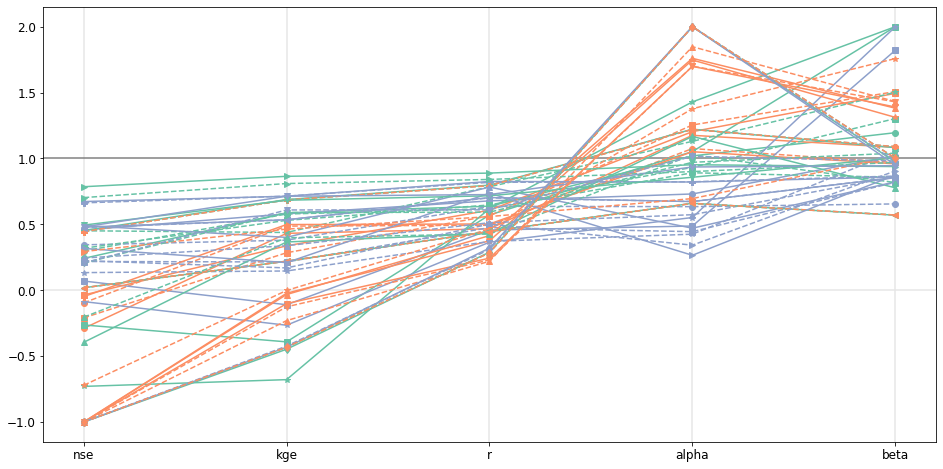

In [47]:
### paralel coord plot of performance
reservoirs = ['cannonsville','pepacton','neversink','prompton','beltzvilleCombined','fewalter','nockamixon','blueMarsh','marshCreek']
models = ['nhm', 'nwm', 'weap', 'nhm_pywr', 'nwm_pywr', 'weap_nhm_pywr']

colordict = {'nhm':'#66c2a5', 'nwm':'#8da0cb', 'weap':'#fc8d62','nhm_pywr':'#66c2a5', 'nwm_pywr':'#8da0cb', 'weap_nhm_pywr':'#fc8d62'}
linestyledict = {'nhm':'-', 'nwm':'-', 'weap':'-','nhm_pywr':'--', 'nwm_pywr':'--', 'weap_nhm_pywr':'--'}
markerdict = {'cannonsville':'o', 'pepacton':'s','neversink':'*','prompton':'P','beltzvilleCombined':'^','fewalter':'<',
              'nockamixon':'>','blueMarsh':'v','marshCreek':'d'}
uselog = False

for j, reservoir in enumerate(reservoirs):
    obs = results_dict['obs'][reservoir]
    for i, d in enumerate(models): 
        try:
            modeled = results_dict[d][f'outflow_{reservoir}']
        except:
            try:
                modeled = results_dict[d][f'link_{reservoir}']
            except:
                try:
                    modeled = results_dict[d][reservoir]
                except:
                    modeled = results_dict['obs'][reservoir] * 0
        ### only do models with nonzero entries (eg remove some weap)
        if np.sum(modeled) > 0:
            kge, r, alpha, beta = he.evaluator(he.kge, modeled, obs)
            nse = he.evaluator(he.nse, modeled, obs)
            if uselog:
                logkge, logr, logalpha, logbeta = he.evaluator(he.kge, np.log(modeled+0.01), np.log(obs+0.01))
                lognse = he.evaluator(he.nse, np.log(modeled+0.01), np.log(obs+0.01))
                resultsdict = {'nse':nse[0], 'kge':kge[0], 'r':r[0], 'alpha':alpha[0], 'beta':beta[0], 'lognse':lognse[0], 'logkge':logkge[0], 'logr':logr[0], 'logalpha':logalpha[0], 'logbeta':logbeta[0]}
            else:
                resultsdict = {'nse':nse[0], 'kge':kge[0], 'r':r[0], 'alpha':alpha[0], 'beta':beta[0]}
                
            ### map all results <-1 to -12, and >2 to 2
            resultsdict = {k: max(min(v, 2), -1) for k,v in resultsdict.items()}
            resultsdict['reservoir'] = reservoir
            resultsdict['model'] = d
            if i == 0 and j == 0:
                results = pd.DataFrame(resultsdict, index=[0])
            else:
                results = results.append(pd.DataFrame(resultsdict, index=[0]))
        
results.reset_index(inplace=True, drop=True)


### parallel coord plot
fig,ax = plt.subplots(1,1,figsize=(16,8), gridspec_kw={'hspace':0.1, 'wspace':0.1})
for j in range(results.shape[1] - 2):
    ax.axvline(j, color='0.9', zorder=1)
ax.axhline(1, color='0.5', zorder=1)
ax.axhline(0, color='0.9', zorder=1)


for i in range(results.shape[0]):
    res = results.iloc[i]
    color = colordict[res['model']]
    ls = linestyledict[res['model']]
    marker = markerdict[res['reservoir']]
    ax.plot(res[:-2], color=color, marker=marker, ls=ls)

In [48]:
from scipy import stats

### compile error across models/reservoirs/metrics
reservoirs = ['cannonsville','pepacton','neversink','prompton','beltzvilleCombined','blueMarsh']
models = ['nhm', 'nwm', 'weap', 'nhm_pywr', 'nwm_pywr', 'weap_nhm_pywr']
models = models[::-1]

# colordict = {'nhm':'#66c2a5', 'nwm':'#8da0cb', 'weap':'#fc8d62','nhm_pywr':'#66c2a5', 'nwm_pywr':'#8da0cb', 'weap_nhm_pywr':'#fc8d62'}
# linestyledict = {'nhm':'-', 'nwm':'-', 'weap':'-','nhm_pywr':'--', 'nwm_pywr':'--', 'weap_nhm_pywr':'--'}
# markerdict = {'cannonsville':'o', 'pepacton':'s','neversink':'*','prompton':'P','beltzvilleCombined':'^','fewalter':'<',
#               'nockamixon':'>','blueMarsh':'v','marshCreek':'d'}

for j, reservoir in enumerate(reservoirs):
    obs = results_dict['obs'][reservoir]
    for i, d in enumerate(models): 
        try:
            modeled = results_dict[d][f'outflow_{reservoir}']
        except:
            try:
                modeled = results_dict[d][f'link_{reservoir}']
            except:
                try:
                    modeled = results_dict[d][reservoir]
                except:
                    modeled = results_dict['obs'][reservoir] * 0
        ### only do models with nonzero entries (eg remove some weap)
        if np.sum(modeled) > 0:
            ### get kge & nse
            kge, r, alpha, beta = he.evaluator(he.kge, modeled, obs)
            nse = he.evaluator(he.nse, modeled, obs)
            logkge, logr, logalpha, logbeta = he.evaluator(he.kge, modeled, obs, transform='log')
            lognse = he.evaluator(he.nse, modeled, obs, transform='log')
            
            ### get normalized area between FDCs
            def get_fdc_area(mod, obs):
                ### convert data to log scale, then normalize by obs range
                df_mod = np.log(mod.sort_values()+0.01)
                exceedance_mod = np.arange(1.,len(df_mod) + 1.)/len(df_mod)
                df_obs = np.log(obs.sort_values())
                exceedance_obs = np.arange(1.,len(df_obs) + 1.)/len(df_obs)
                logmax = df_obs.max()
                logmin = df_obs.min()
                df_mod = (df_mod - logmin) / (logmax - logmin)
                df_obs = (df_obs - logmin) / (logmax - logmin)
                abs_area = 0
                for k in range(len(df_obs)-1):
                    dx = exceedance_obs[k+1] - exceedance_obs[k]
                    dy_midpt = np.abs((df_obs[k+1] - df_mod[k+1]) + (df_obs[k] - df_mod[k]))/2
                    abs_area += dx * dy_midpt
                # return 1 - abs_area, which will be 1 in ideal case and 0 in worst case.
                return 1-abs_area 
                
            fdc_area = get_fdc_area(modeled, obs)
            
            ### get Kolmogorov-Smirnov Statistic
            # return 1 - abs_area, which will be 1 in ideal case and 0 in worst case.
            kss, _ = stats.ks_2samp(modeled, obs)            
            kss = 1 - kss
            
            resultsdict = {'nse':nse[0], 'kge':kge[0], 'r':r[0], 'alpha':alpha[0], 'beta':beta[0], 
                           'lognse':lognse[0], 'logkge':logkge[0], 'logr':logr[0], 'logalpha':logalpha[0], 'logbeta':logbeta[0], 
                           'fdcArea':fdc_area, 'kss':kss}
                
            resultsdict['reservoir'] = reservoir
            resultsdict['model'] = d
            if i == 0 and j == 0:
                results = pd.DataFrame(resultsdict, index=[0])
            else:
                results = results.append(pd.DataFrame(resultsdict, index=[0]))
        
results.reset_index(inplace=True, drop=True)
results

nse       kge         r     alpha      beta     lognse    logkge  \
0  -0.095689  0.486770  0.493240  1.075028  0.968862  -0.126987  0.269243   
1   0.344682  0.379958  0.636881  0.634407  0.655124   0.154833  0.493234   
2   0.297616  0.578503  0.618485  0.891429  0.857460   0.097703  0.448387   
3  -0.289349  0.431901  0.466426  1.175831  1.084370   0.051029  0.430764   
4   0.456981  0.579774  0.678197  0.730577  1.021073  -0.227212  0.158454   
5   0.241620  0.587829  0.637720  1.019112  1.195633  -0.298269  0.198725   
6  -0.209664  0.284570  0.564495  1.254142  1.507530  -0.296514  0.385378   
7   0.218114  0.214753  0.475103  0.444614  0.819329   0.349790  0.576386   
8   0.318743  0.530333  0.647219  0.932544  1.302626   0.155899  0.589236   
9  -0.036319  0.337108  0.607347  1.203408  1.493837  -0.289850  0.335911   
10  0.070066 -0.109832  0.457078  0.487335  1.821059  -0.966569  0.197219   
11 -0.263222 -0.391655  0.571193  1.052219  2.322914  -1.181311  0.253773   
12 -0.721534 -0.001571  0.465484  1.377738  1.758123  -0.718099  0.270723   
13  0.133852  0.146200  0.370618  0.425428  1.052151   0.072378  0.436457   
14  0.451377  0.438361  0.785306  1.129930  1.502457  -0.186117  0.472186   
15 -1.759791 -0.022794  0.375097  1.747150  1.312041 -12.284418 -0.983003   
16 -0.086088 -0.265403  0.364447  0.551863  1.998243  -1.406261  0.134317   
17 -0.729660 -0.678307  0.619835  1.429145  2.577346  -1.733851  0.213817   
18  0.444595  0.685185  0.793758  1.220349  1.089548   0.700414  0.845017   
19  0.663088  0.713930  0.819036  0.823096  0.866608   0.823389  0.839162   
20  0.444595  0.685185  0.793758  1.220349  1.089548   0.700414  0.845017   
21 -0.048508  0.498598  0.502856  1.051185  0.959598   0.197679  0.613646   
22  0.673100  0.713398  0.825662  0.821346  0.859183   0.841335  0.864183   
23  0.452449  0.688239  0.797424  1.222292  1.082123   0.714217  0.857791   
24 -2.746927 -0.230463  0.220045  1.848004  1.431972  -0.378773  0.397373   
25  0.244394  0.337799  0.512612  0.573306  0.862539   0.417473  0.445156   
26 -0.204483  0.397998  0.427070  1.027831  0.817291   0.237475  0.638794   
27 -1.751764 -0.032454  0.414456  1.759940  1.381564  -0.237434  0.473219   
28  0.491060  0.401147  0.782857  0.470766  0.822842   0.594758  0.531770   
29 -0.395382  0.366329  0.430801  1.167301  0.777374  -0.227823  0.556349   
30 -2.255543 -0.125658  0.230255  1.700025  1.429608  -0.001258  0.551649   
31  0.207079  0.609313  0.610123  1.016169  0.980731   0.467413  0.725188   
32  0.206415  0.589400  0.592409  0.970873  1.040169   0.528949  0.669999   
33 -2.181146 -0.101440  0.243571  1.698848  1.390636  -0.119326  0.528906   
34  0.480856  0.713238  0.726030  0.935433  0.945189   0.532198  0.772162   
35  0.494196  0.683018  0.716914  0.857457  1.004665   0.619963  0.728836   

        logr  logalpha   logbeta   fdcArea       kss           reservoir  \
0   0.309202  0.763508  1.029609  0.948115  0.759582        cannonsville   
1   0.530752  0.815248  0.950145  0.945306  0.722748        cannonsville   
2   0.474809  0.831416  0.994440  0.960439  0.777252        cannonsville   
3   0.460750  0.822277  1.040668  0.961022  0.832255        cannonsville   
4   0.226459  0.674962  1.064696  0.943992  0.821802        cannonsville   
5   0.244295  0.744784  1.076260  0.944131  0.832753        cannonsville   
6   0.430040  0.829784  1.154701  0.907440  0.567944            pepacton   
7   0.634143  0.791336  1.045347  0.952766  0.768293            pepacton   
8   0.632715  0.860363  1.119711  0.927787  0.653808            pepacton   
9   0.505703  0.604008  1.199687  0.874925  0.349179            pepacton   
10  0.426385  0.519762  1.291196  0.822142  0.370831            pepacton   
11  0.409571  0.664292  1.309109  0.817376  0.373071            pepacton   
12  0.320943  0.815258  1.191303  0.901291  0.556247           neversink   
13  0.523360  0.717174  1.102000  0.941402  0.714783           neversink   
14  0.536030  0.805

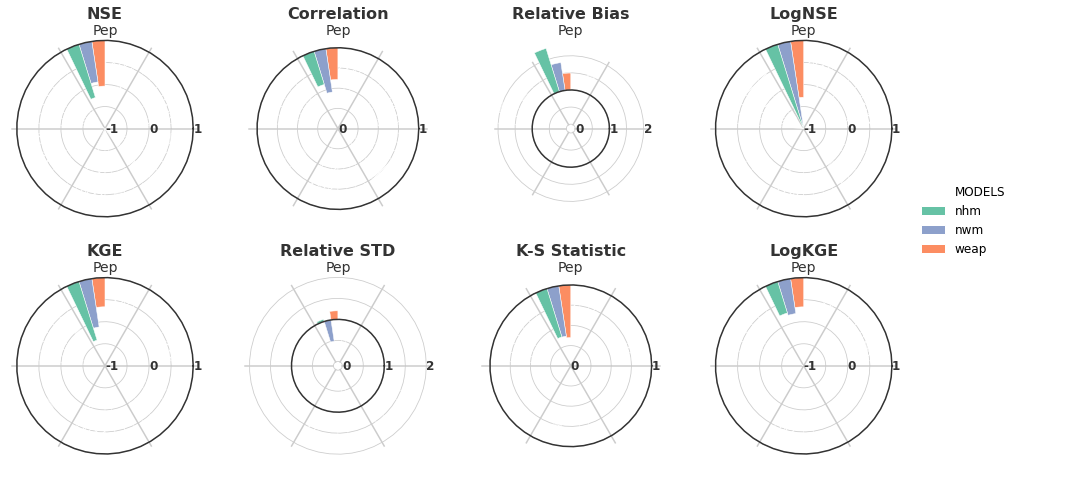

In [49]:
### now do radial plots across diff metrics/reservoirs/models,
### following galleries here https://www.python-graph-gallery.com/circular-barplot-with-groups

useNonPep = False
useweap = True
usepywr = False

fig, axs = plt.subplots(2,4,figsize=(16,8), subplot_kw={"projection": "polar"})

reservoirs = ['cannonsville','pepacton','neversink','prompton','beltzvilleCombined','blueMarsh']
models = ['nhm', 'nwm', 'weap', 'nhm_pywr', 'nwm_pywr', 'weap_nhm_pywr']
models = models[::-1]
metrics = ['nse','kge','r','alpha','beta','kss','lognse','logkge']

colordict = {'nhm':'#66c2a5', 'nwm':'#8da0cb', 'weap':'#fc8d62','nhm_pywr':'#66c2a5', 'nwm_pywr':'#8da0cb', 'weap_nhm_pywr':'#fc8d62'}
hatchdict = {'nhm':'', 'nwm':'', 'weap':'','nhm_pywr':'///', 'nwm_pywr':'///', 'weap_nhm_pywr':'///'}
edgedict = {'nhm':'w', 'nwm':'w', 'weap':'w','nhm_pywr':'w', 'nwm_pywr':'w', 'weap_nhm_pywr':'w'}
labeldict = {'pepacton':'Pep','cannonsville':'Can','neversink':'Nev','prompton':'Pro','beltzvilleCombined':'Bel','blueMarsh':'Blu'}
titledict = {'nse':'NSE','kge':'KGE','r':'Correlation','alpha':'Relative STD','beta':'Relative Bias','kss':'K-S Statistic','lognse':'LogNSE','logkge':'LogKGE'}

for k, metric in enumerate(metrics):
    row = k % 2
    col = int(k / 2)
    ax = axs[row,col]
    
    PAD = 1
    GROUPS = len(reservoirs)
    ANGLES = np.linspace(0, 2 * np.pi, len(reservoirs) * len(models) + PAD * GROUPS, endpoint=False)
    VALUES = np.maximum(np.minimum(results[metric], 3), -1) - 1


    LABELS = [reservoir + '_' + model for reservoir,model in zip(results['reservoir'], results['model'])]
    COLORS = [colordict[model] for model in results['model']]
    if not usepywr:
        if not useweap:
            MASK = [m in models[-2:] for m in results['model']]
        else:
            MASK = [m in models[-3:] for m in results['model']]
        COLORS = [v if m else 'none' for m,v in zip(MASK, COLORS)]
    if not useNonPep:
        MASK = [r == 'pepacton' for r in results['reservoir']]
        COLORS = [v if m else 'none' for m,v in zip(MASK, COLORS)]
    
    EDGES = [edgedict[model] for model in results['model']]
    HATCHS = [hatchdict[model] for model in results['model']]

    WIDTH = 2 * np.pi / len(ANGLES)

    ### Obtaining the right indexes is now a little more complicated
    offset = 0
    IDXS = []
    GROUPS_SIZE = [len(models)] * len(reservoirs)
    for size in GROUPS_SIZE:
        IDXS += list(range(offset + PAD, offset + size + PAD))
        offset += size + PAD

    ### Remove all spines
    ax.set_frame_on(False)

    ax.xaxis.grid(False)
    ax.yaxis.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

    ### Set limits for radial (y) axis. The negative lower bound creates the whole in the middle.
    if metric in ['fdcm','r','kss']:
        ax.set_ylim(-1, 0.2)
        yrings = [-1, -0.25, -0.5, -0.75, 0]
    elif metric in ['alpha', 'beta']:
#         ax.set_ylim(-1, 2.2)
        yrings = [-1, -0.5, 0, 0.5, 1]
    elif metric in ['kge', 'nse','logkge','lognse']:
        ax.set_ylim(-2, 0.2)
        yrings = [-2, -1.5, -1, -0.5, 0]

    # Add reference lines 
    x2 = np.linspace(0, 2 * np.pi, num=50)
    for j,y in enumerate(yrings):
        if y == 0:
            ax.plot(x2, [y] * 50, color="#333333", lw=1.5, zorder=3)

        ax.plot(x2, [y] * 50, color="0.8", lw=0.8, zorder=1)
        if (np.abs(y - int(y))<0.001):
            ax.text(0, y, round(y+1, 2), color="#333333", fontsize=12, fontweight="bold", ha="left", va="center")

    for j in range(GROUPS):
        angle = 2 * np.pi / GROUPS * j
        ax.plot([angle, angle], [yrings[0],yrings[-1]+0.1], color='0.8', zorder=1)

    ### Add bars
    ax.bar(
        ANGLES[IDXS], VALUES, width=WIDTH, linewidth=0.5,
        color=COLORS, hatch=HATCHS, edgecolor=EDGES, zorder=2, 
    )


    ### customization to add group annotations
    offset = 0 
    for j, reservoir in enumerate(reservoirs):
        # Add line below bars
        x1 = np.linspace(ANGLES[offset + PAD], ANGLES[offset + size + PAD - 1], num=50)

        # Add text to indicate group
        wedge = 360 / len(reservoirs)
        rotation = -90 + wedge/2 + wedge*j
        if j >= 3:
            rotation += 180
        if useNonPep or reservoir == 'pepacton':
            fontcolor = "#333333"
        else:
            fontcolor = "w"
            
        ax.text(
            np.mean(x1), ax.get_ylim()[1]+0.01*(ax.get_ylim()[1] - ax.get_ylim()[0]), labeldict[reservoir], color=fontcolor, fontsize=14, 
            ha="center", va="center", rotation=rotation
        )
        

        offset += size + PAD

    ax.text(np.pi/2, ax.get_ylim()[1]+0.18*(ax.get_ylim()[1] - ax.get_ylim()[0]), titledict[metric], color="#333333", fontsize=16, 
        fontweight="bold", ha="center", va="center")

        
legend_elements = []
legend_elements.append(Line2D([0],[0],color='none',label='MODELS'))
for d in models[::-1]:
    if usepywr or d in models[-2:] or (useweap and d == models[-3]):
        legend_elements.append(Patch(facecolor=colordict[d], edgecolor=edgedict[d], label=d, hatch=hatchdict[d]))
    else:
        legend_elements.append(Patch(facecolor='w', edgecolor='w', label=d, hatch=hatchdict[d]))

leg = plt.legend(handles=legend_elements, loc='center', bbox_to_anchor=(1.45,1.1), frameon=False)
for i, text in enumerate(leg.get_texts()):
    if not usepywr and i > 3:
        text.set_color("w")
    elif not useweap and i > 2:
        text.set_color('w')
    
filename_res = 'allRes' if useNonPep else 'pep'
if usepywr:
    filename_mod = 'allMod_withPywr'
elif useweap:
    filename_mod = 'allMod_withoutPywr'
else:
    filename_mod = 'NhmNwm_withoutPywr'

plt.savefig(f'{figdir}/radialMetrics_{filename_res}_{filename_mod}.png', bbox_inches='tight', dpi=300)    

In [50]:
results_dict.keys()

dict_keys(['nhm_pywr', 'nwm_pywr', 'weap_nhm_pywr', 'pub_pywr', 'obs', 'nhm', 'nwm', 'weap', 'pub'])

In [51]:
crmsd

array([ 0.        , 42.72882043])

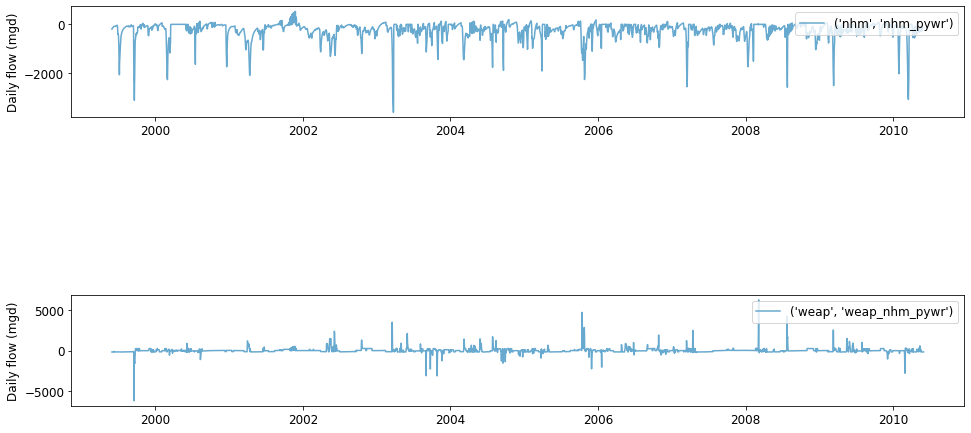

In [52]:
### plot pywr minus each of three inflow estimates: NHM, NWM, WEAP, PUB
reservoir = 'pepacton'

uselog = False

fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(4,1,  wspace=0.25, hspace=0.3)
for i, d in enumerate((('nhm','nhm_pywr'),('nwm','nwm_pywr'),('weap', 'weap_nhm_pywr'),('pub','pub_pywr'))): 
    if usepywr or i % 2 == 0:
        ### first plot time series of observed vs modeled
        row = i
        color = colors[1]
        ax = fig.add_subplot(gs[row,0])
        try:
            inflow = results_dict[d[0]][f'outflow_{reservoir}']
        except:
            try:
                inflow = results_dict[d[0]][f'link_{reservoir}']
            except:
                try:
                    inflow = results_dict[d[0]][reservoir]
                except:
                    inflow = results_dict['obs'][reservoir] * 0
        try:
            outflow = results_dict[d[1]][f'outflow_{reservoir}']
        except:
            try:
                outflow = results_dict[d[1]][f'link_{reservoir}']
            except:
                try:
                    outflow = results_dict[d[1]][reservoir]
                except:
                    outflow = results_dict['obs'][reservoir] * 0
                    
        ax.plot(outflow - inflow, label=d, color=color)

        ax.legend(loc='upper right')
        ax.set_ylabel('Daily flow (mgd)')
        
        if uselog:
            ax.semilogy()
        



9.280497885517027 1.3186894993892029


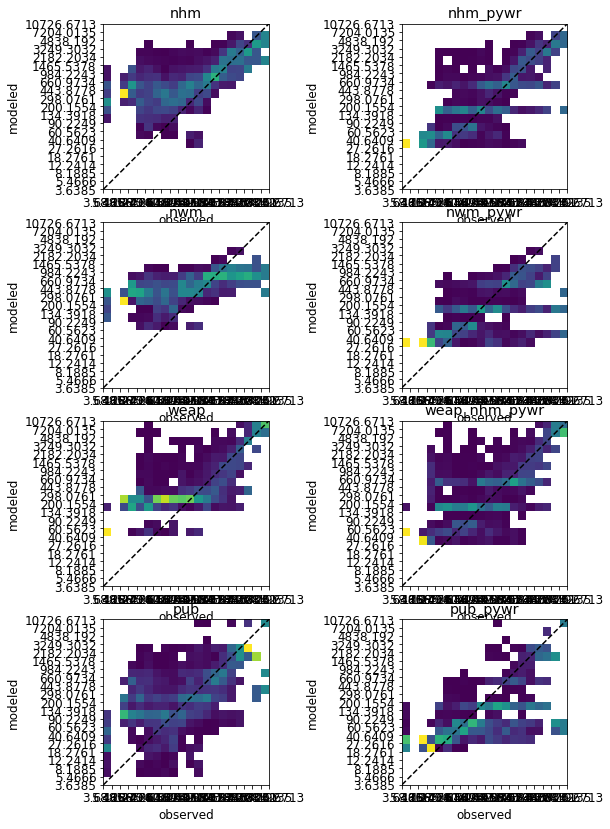

In [53]:
### replicate time-linked flow duration curve from Moges et al
### their code under timeLinkedFDC() at https://github.com/EMscience/HydroBench/blob/master/Functions/plottingUtilities_Widget.py
nbins = 20
uselog = True
normColsOnly = True

fig = plt.figure(figsize=(10, 14))
gs = fig.add_gridspec(4,2, wspace=0.15, hspace=0.2)

### get bins from overall data
bmax = -np.inf
bmin = np.inf
for i, d in enumerate(('nhm','nwm','weap','pub','nhm_pywr','nwm_pywr','weap_nhm_pywr','pub_pywr', 'obs')):
    try:
        mod = results_dict[d][f'outflow_{reservoir}']
    except:
        try:
            mod = results_dict[d][f'link_{reservoir}']
        except:
            try:
                mod = results_dict[d][reservoir]
            except:
                mod = results_dict['obs'][reservoir] * 0
    bmax = max(bmax, mod.max())
    bmin = min(bmin, mod.min())
if uselog:
    bmax = np.log(bmax + 0.01)
    bmin = np.log(bmin + 0.01)
print(bmax, bmin)
bins = np.arange(bmin, bmax - 0.01, (bmax - bmin) / nbins)
bins = bins[1:]       
    
for i, d in enumerate(('nhm','nwm','weap','pub','nhm_pywr','nwm_pywr','weap_nhm_pywr','pub_pywr')):
    
    row = (i+1)%4 -1
    col = int(i/4)
    ax = fig.add_subplot(gs[row, col])

    ### get observed vs modeled timeseries for this reservoir
    obs = results_dict['obs'][reservoir]
    try:
        mod = results_dict[d][f'outflow_{reservoir}']
    except:
        try:
            mod = results_dict[d][f'link_{reservoir}']
        except:
            try:
                mod = results_dict[d][reservoir]
            except:
                mod = results_dict['obs'][reservoir] * 0

    if uselog:
        obs = np.log(obs + 0.01)
        mod = np.log(mod + 0.01)

    ### categorize data into bins
    obs_dig = pd.Series(np.digitize(obs, bins), name='obs')
    mod_dig = pd.Series(np.digitize(mod, bins), name='mod')
    df_confusion = pd.crosstab(mod_dig, obs_dig, rownames=['mod'], colnames=['obs'])
    ### infill empty columns & rows
    for i in range(nbins):
        if i not in df_confusion.columns:
            df_confusion[i] = np.zeros(df_confusion.shape[0])
    for i in range(nbins):
        if i not in df_confusion.index:
            df_confusion.loc[i,:] = np.zeros(df_confusion.shape[1])
    df_confusion.sort_index(inplace=True)
    df_confusion = df_confusion.loc[:, range(nbins)]
    if normColsOnly:
        df_confusion /= df_confusion.sum(axis=0)
    else:
        df_confusion /= df_confusion.sum(axis=1).sum()
    df_confusion

    ### mask out zeros
    df_confusion = np.ma.masked_where(df_confusion == 0, df_confusion)

    ### plot confusion matrix
    ax.imshow(df_confusion, origin='lower')

    binlabels = [bmin] + list(bins) + [bmax]
    if uselog:
        binlabels = np.exp(binlabels) - 0.1
    binlabels = [round(x, 4) for x in binlabels]
    _ = ax.set_xticks(np.arange(-0.5, nbins + 0.5), labels=binlabels)
    _ = ax.set_yticks(np.arange(-0.5, nbins + 0.5), labels=binlabels)
    ax.plot((-0.5, 19.5), (-0.5, 19.5), color='k', ls='--')
    ax.set_title(d)
    _ = ax.set_xlabel('observed')
    _ = ax.set_ylabel('modeled')

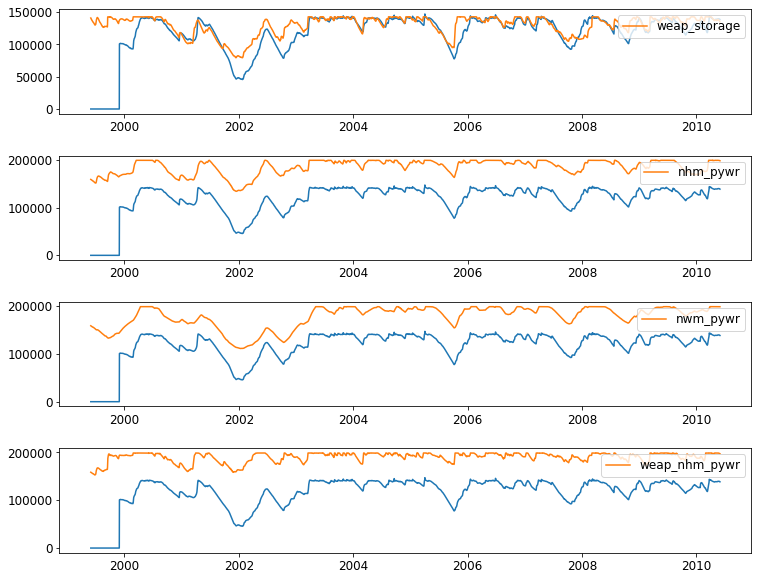

In [54]:
### compare reservoir storages where data exists
results_dict['weap_storage'] = storage

fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(4,2,  width_ratios=(5,1), wspace=0.15, hspace=0.4)
for i, d in enumerate(('weap_storage','nhm_pywr','nwm_pywr','weap_nhm_pywr')):
    ax = fig.add_subplot(gs[i,0])
    try:
        modeled = results_dict[d][f'{reservoir}']
    except:
        modeled = results_dict[d][f'reservoir_{reservoir}']
    try:
        ax.plot(storageObs[reservoir])
    except:
        pass
    ax.plot(modeled, label=d)
#     ax.semilogy()
    ax.legend(loc='upper right')


147089.85600000003
147089.85600000003
147089.85600000003
147089.85600000003


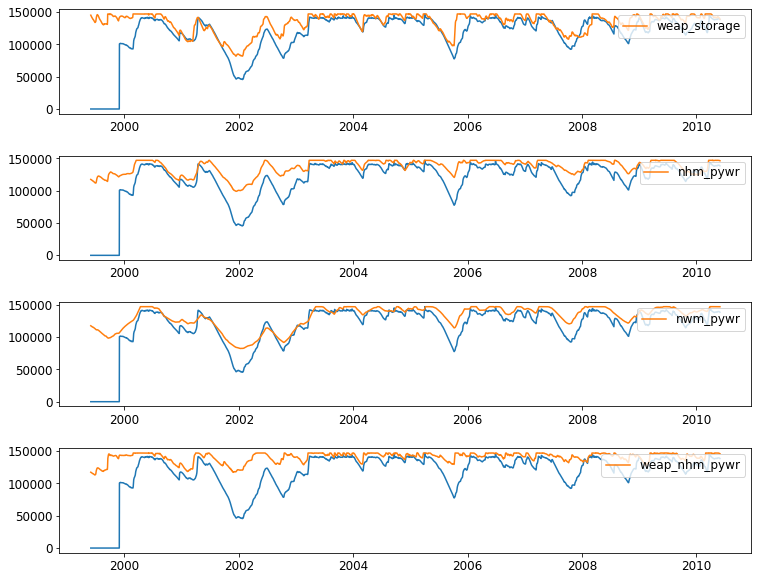

In [55]:
### compare reservoir storages where data exists - rescale based on max volume for comparison
results_dict['weap_storage'] = storage

fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(4,2,  width_ratios=(5,1), wspace=0.15, hspace=0.4)
for i, d in enumerate(('weap_storage','nhm_pywr','nwm_pywr','weap_nhm_pywr')):
    ax = fig.add_subplot(gs[i,0])
    try:
        ax.plot(storageObs[reservoir])
        maxStorage = storageObs[reservoir].max()
        print(maxStorage)
    except:
        maxStorage = -1
    try:
        modeled = results_dict[d][f'{reservoir}']
    except:
        modeled = results_dict[d][f'reservoir_{reservoir}']
    if maxStorage > 0:
        modeled *= maxStorage / modeled.max()

    ax.plot(modeled, label=d)
#     ax.semilogy()
    ax.legend(loc='upper right')


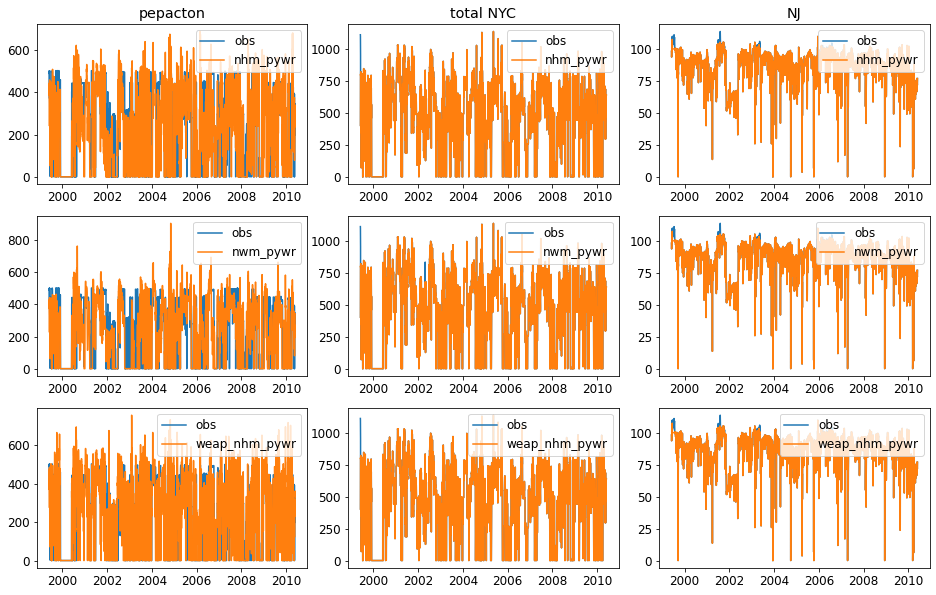

In [56]:
### compare deliveries to NYC & NJ
results_dict['deliveryNYC'] = deliveryNYC
results_dict['deliveryNJ'] = deliveryNJ

fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(3,3, wspace=0.15, hspace=0.2)
for i, d in enumerate(('nhm_pywr','nwm_pywr','weap_nhm_pywr')):
    ax = fig.add_subplot(gs[i,0])
    if i == 0:
        ax.set_title(reservoir)
    obs = results_dict['deliveryNYC'][f'{reservoir}']
    modeled = results_dict[d][f'link_{reservoir}_nyc']
    ax.plot(obs, label='obs')
    ax.plot(modeled, label=d)
    ax.legend(loc='upper right')
    
for i, d in enumerate(('nhm_pywr','nwm_pywr','weap_nhm_pywr')):
    ax = fig.add_subplot(gs[i,1])
    if i == 0:
        ax.set_title('total NYC')
    obs = results_dict['deliveryNYC']['aggregate']
    modeled = results_dict[d][f'link_cannonsville_nyc'] + results_dict[d][f'link_pepacton_nyc'] + results_dict[d][f'link_neversink_nyc']
    ax.plot(obs, label='obs')
    ax.plot(modeled, label=d)
    ax.legend(loc='upper right')
    
for i, d in enumerate(('nhm_pywr','nwm_pywr','weap_nhm_pywr')):
    ax = fig.add_subplot(gs[i,2])
    if i == 0:
        ax.set_title('NJ')
    obs = results_dict['deliveryNJ']['D_R_Canal']
    modeled = results_dict[d][f'delivery_nj'] 
    ax.plot(obs[modeled.index], label='obs')
    ax.plot(modeled, label=d)
    ax.legend(loc='upper right')



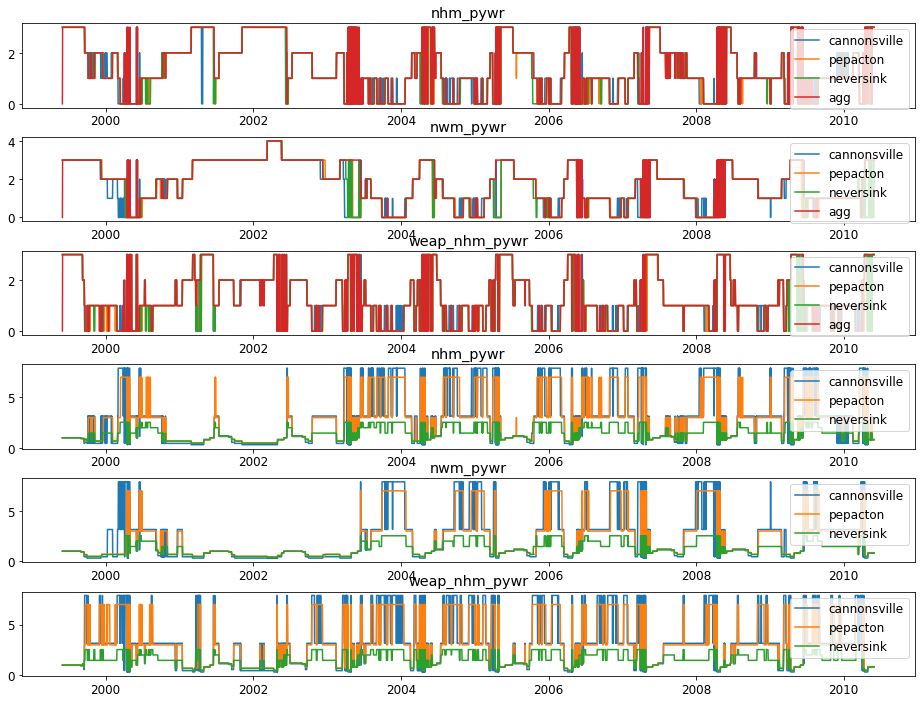

In [57]:
### plot flood/drought levels for nyc reservoirs

fig = plt.figure(figsize=(16, 12))
gs = fig.add_gridspec(6, hspace=0.35)
for i, d in enumerate(('nhm_pywr','nwm_pywr','weap_nhm_pywr')):
    ax = fig.add_subplot(gs[i])
    if i == 0:
        ax.set_title(reservoir)
    for r in ('cannonsville', 'pepacton', 'neversink'):
        modeled = results_dict[d][f'drought_level_{r}']
        ax.plot(modeled, label=r)
    modeled = results_dict[d][f'drought_level_agg_nyc']
    ax.plot(modeled, label='agg')
    ax.legend(loc='upper right')
    ax.set_title(d)

for i, d in enumerate(('nhm_pywr','nwm_pywr','weap_nhm_pywr')):
    ax = fig.add_subplot(gs[i+3])
    if i == 0:
        ax.set_title(reservoir)
    for r in ('cannonsville', 'pepacton', 'neversink'):
        modeled = results_dict[d][f'mrf_drought_factor_combined_final_{r}']
        ax.plot(modeled, label=r)
    ax.legend(loc='upper right')
    ax.set_title(d)


In [58]:
bins

array([1.71677992, 2.11487034, 2.51296076, 2.91105118, 3.3091416 ,
       3.70723202, 4.10532243, 4.50341285, 4.90150327, 5.29959369,
       5.69768411, 6.09577453, 6.49386495, 6.89195537, 7.29004579,
       7.68813621, 8.08622663, 8.48431705, 8.88240747])